# Data Exploration

In [1]:
# Load the Pandas libraries with alias 'pd' 
#import kaggle as kg
import pandas as pd
import numpy as np
import scipy as sc

%matplotlib inline
import os
from os.path import join
from pprint import pprint

import matplotlib.pyplot as plt

In [2]:
file_path="C:\\Users\\EGEMEN\\Desktop\\ml_project\\data\\historical_stock_prices.csv"
data = pd.read_csv(file_path)

# Giving basic information regarding the dataset such as shape, data types and descriptive statistics that summarize columns

In [3]:
# print shape
print('Data Dimensionality: ',data.shape)
print("There are " + str(data.shape[0]) + " rows and "+ str(data.shape[1])+" attributes in historical stock prices data")

Data Dimensionality:  (20973889, 8)
There are 20973889 rows and 8 attributes in historical stock prices data


In [4]:
# print attribute names

print('Attribute Names: ',data.columns)

Attribute Names:  Index(['ticker', 'open', 'close', 'adj_close', 'low', 'high', 'volume',
       'date'],
      dtype='object')


# Meanings of the attributes
* Ticker: The symbol for the stock
* open: The open price
* close: The close price
* adj_close: The adjusted close price
* low: The low price
* high: The high price
* volume: The volume
* date: The date

In [5]:
print("The number of stocks are: " +str((data['ticker'].nunique())))

The number of stocks are: 5685


In [6]:
# print first 5 rows in your dataset
print('Head of Data: ')
data.head()

Head of Data: 


,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


In [7]:
# print data types of the columns
print('Data types: ',data.dtypes)

Data types:  ticker        object
open         float64
close        float64
adj_close    float64
low          float64
high         float64
volume         int64
date          object
dtype: object


In [8]:
data.isnull().sum()  # NaN counts in each column

ticker       0
open         0
close        0
adj_close    0
low          0
high         0
volume       0
date         0
dtype: int64

There is no missing value at any attribute or row so we are fine to proceed without preprocessing.

In [9]:
#Descriptive statistics of taxitrips data
data.describe()

,open,close,adj_close,low,high,volume
count,2.097389e+07,2.097389e+07,2.097389e+07,2.097389e+07,2.097389e+07,2.097389e+07
mean,7.605823e+01,7.611403e+01,1.481184e+14,7.422064e+01,7.803857e+01,1.227043e+06
std,2.849639e+03,2.870159e+03,4.574674e+16,2.746059e+03,2.997937e+03,1.316686e+07
min,4.000000e-04,2.000000e-04,2.282650e-09,1.000000e-04,4.000000e-04,1.000000e+00
25%,7.500000e+00,7.500000e+00,4.620000e+00,7.360000e+00,7.630000e+00,2.210000e+04
50%,1.545000e+01,1.545000e+01,1.138199e+01,1.524000e+01,1.566000e+01,1.260000e+05
75%,2.972000e+01,2.972000e+01,2.472046e+01,2.928000e+01,3.010000e+01,6.074000e+05
max,2.034000e+06,1.779750e+06,1.894962e+19,1.440000e+06,2.070000e+06,4.483504e+09


# Preprocessing

In [10]:
type(data['date'].iloc[0])

str

The date attribute is string type object. It is better to convert it to datetime object to wrangle.

In [11]:
data['date']= pd.to_datetime(data['date'])

In [12]:
type(data['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Now it's date time object.

In [13]:
data['date'].head()

0   2013-05-08
1   2013-05-09
2   2013-05-10
3   2013-05-13
4   2013-05-14
Name: date, dtype: datetime64[ns]

In [14]:
print("The minimum year of the dataset is: "+str(min(data['date'].dt.year))  )
print("The maximum year of the dataset is: "+str(max(data['date'].dt.year))  )

The minimum year of the dataset is: 1970
The maximum year of the dataset is: 2018


In [15]:
#Send the parameter as zero to be displayed until the start or end.
def filter_by_year(data, start=0, end=0):
    if start and end: 
        return data[(data['date'].dt.year<end) & (data['date'].dt.year>start)]
    elif not start:
        return data[(data['date'].dt.year<end)]
    elif not end: 
        return data[(data['date'].dt.year>start)]

In [16]:
data.sort_values(by='date')

,ticker,open,close,adj_close,low,high,volume,date
4285669,XOM,1.929688,1.937500,0.025623,1.925781,1.937500,1174400,1970-01-02
14184994,AA,7.140915,7.140915,1.986261,7.140915,7.225020,22500,1970-01-02
15384996,BA,0.925926,0.979424,0.229325,0.925926,0.979424,634400,1970-01-02
18215303,DIS,0.688281,0.683144,0.282199,0.683144,0.689565,1109700,1970-01-02
18189682,PG,1.710938,1.718750,0.020346,1.708984,1.722656,832000,1970-01-02
...,...,...,...,...,...,...,...,...
8401737,INST,38.200001,39.099998,39.099998,38.200001,39.150002,240400,2018-08-24
8400366,SQQQ,12.120000,11.890000,11.890000,11.870000,12.120000,13058000,2018-08-24
8392730,PBFX,21.799999,21.600000,21.600000,21.500000,21.850000,87000,2018-08-24
8414092,POPE,73.000000,73.000000,73.000000,73.000000,73.000000,1100,2018-08-24


In [17]:
def filter_by_company(whole_data, stock):
    return whole_data[whole_data['ticker']==stock]

In [18]:
filter_by_company(data, "AA").shape

(12273, 8)

### Separating the data according to the economic recessions in the USA. 
Information about the recession dates retrieved from the site below: 

https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States

In [19]:
def separate_data(data):
    #after_2009=data[data['date'].dt.year>2009]
    after_2009=filter_by_year(data, start= 2009)
    #between_2001_07=data[(data['date'].dt.year<2007) & (data['date'].dt.year>2001)]
    between_2001_07=filter_by_year(data, 2001, 2007)
    
    #between_91_2001=data[(data['date'].dt.year<2001) & (data['date'].dt.year>1991)]
    between_91_2001=filter_by_year(data, 1991, 2001)
    
    #between_82_90=data[(data['date'].dt.year<1990) & (data['date'].dt.year>1982)]
    between_82_90=filter_by_year(data, 1982, 1990)
    
    #before_80=data[data['date'].dt.year<1980]
    before_80=filter_by_year(data, end=1980) 
    
    return [after_2009, between_2001_07, between_91_2001,between_82_90, before_80]

In [20]:
print("The minimum year of the dataset is: "+str(min(separate_data(data)[0]['date'].dt.year))  )

The minimum year of the dataset is: 2010


So, splitting the data works as what we expected.

In [23]:
dfs=separate_data(data)
print('Row count of After 2009: ',dfs[0].shape[0])
print('Row count of Between 2001 and 2007: ',dfs[1].shape[0])
print('Row count of Between 1991 and 2001: ',dfs[2].shape[0])
print('Row count of Between 1982 and 1990: ',dfs[3].shape[0])
print('Row count of Before 1980: ',dfs[4].shape[0])

Row count of After 2009:  9338934
Row count of Between 2001 and 2007:  3164685
Row count of Between 1991 and 2001:  3498670
Row count of Between 1982 and 1990:  1158835
Row count of Before 1980:  164499


In [24]:
def count_non_recessed(data, data_frames):
    non_recessed_count=0
    for df in data_frames:
        non_recessed_count+=df.shape[0]
    print("We lost "+str(data.shape[0]- non_recessed_count)+ " number of rows after separating the datasets. ")

In [25]:
count_non_recessed(data, dfs)

We lost 3648266 number of rows after separating the datasets. 


In [26]:
def combine_datasets(data_frames):
    non_recessed_data=pd.concat(data_frames)
    non_recessed_data=non_recessed_data.sort_values(by='date')
    return non_recessed_data

In [27]:
non_recessed_data=combine_datasets(dfs)

In [28]:
non_recessed_data

,ticker,open,close,adj_close,low,high,volume,date
10537878,IBM,18.225000,18.237499,1.624962,18.200001,18.287500,315200,1970-01-02
3892482,MRO,5.633611,5.757882,0.203525,5.633611,5.757882,105900,1970-01-02
12846742,CVX,3.195312,3.265625,0.072620,3.195312,3.265625,526400,1970-01-02
10103898,MCD,0.353909,0.364198,0.003755,0.353909,0.364198,2825600,1970-01-02
2515733,CNP,11.099500,11.169750,0.107916,10.994125,11.204875,24400,1970-01-02
...,...,...,...,...,...,...,...,...
3938624,IDRA,8.410000,9.170000,9.170000,8.400000,9.240000,418100,2018-08-24
16628203,FCX,14.540000,14.470000,14.470000,14.360000,14.790000,13287600,2018-08-24
738215,AIR,45.869999,45.990002,45.990002,45.610001,46.139999,87100,2018-08-24
11198367,CTU,25.280001,25.290001,25.290001,25.280001,25.299999,119100,2018-08-24


# Data Visualisation

In [116]:
#Visualise predicted and actual stock prices
#Send the multi argument as True if multi time-series are to be displayed. 
def visualise(actual, img_name, predicted=None, attribute='high', nof_datepts=10):
    plt.figure(figsize = (18,9))
    plt.grid()
    plt.plot(range(actual.shape[0]),actual[attribute])
    if predicted is not None:
        plt.plot(range(len(predicted)),predicted)
    plt.xticks(range(0,actual.shape[0],int(actual.shape[0]/nof_datepts)+1),actual['date'].loc[::int(actual.shape[0]/nof_datepts)+1],rotation=45)
    plt.xlabel('Date',fontsize=18)
    plt.ylabel(str(attribute.capitalize())+ ' prices of '+str(ticker),fontsize=18)
    plt.savefig(img_name)
    plt.show()


In [30]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [31]:
apple = filter_by_company(non_recessed_data,"AAPL")

In [32]:
apple

,ticker,open,close,adj_close,low,high,volume,date
6788,AAPL,0.533482,0.508929,0.022985,0.504464,0.540179,28207200,1983-01-03
6792,AAPL,0.508929,0.537946,0.024295,0.500000,0.540179,55927200,1983-01-04
6808,AAPL,0.537946,0.540179,0.024396,0.529018,0.544643,35386400,1983-01-05
6812,AAPL,0.540179,0.520089,0.023489,0.517857,0.542411,24449600,1983-01-06
6828,AAPL,0.520089,0.491071,0.022178,0.491071,0.526786,43013600,1983-01-07
...,...,...,...,...,...,...,...,...
100491,AAPL,218.100006,215.460007,215.460007,215.110001,219.179993,30287700,2018-08-20
100492,AAPL,216.800003,215.039993,215.039993,214.029999,217.190002,26159800,2018-08-21
100493,AAPL,214.100006,215.050003,215.050003,213.839996,216.360001,19018100,2018-08-22
100494,AAPL,214.649994,215.490005,215.490005,214.600006,217.050003,18883200,2018-08-23


In [33]:
ticker="AAPL"
apple_after_2009=filter_by_company(filter_by_year(data, start=2009), ticker)

In [34]:
apple_after_2009

,ticker,open,close,adj_close,low,high,volume,date
78258,AAPL,30.490000,30.572857,20.544939,30.340000,30.642857,123432400,2010-01-04
78274,AAPL,30.657143,30.625713,20.580460,30.464285,30.798571,150476200,2010-01-05
78280,AAPL,30.625713,30.138571,20.253105,30.107143,30.747143,138040000,2010-01-06
78296,AAPL,30.250000,30.082857,20.215658,29.864286,30.285715,119282800,2010-01-07
78302,AAPL,30.042856,30.282858,20.350058,29.865715,30.285715,111902700,2010-01-08
...,...,...,...,...,...,...,...,...
100491,AAPL,218.100006,215.460007,215.460007,215.110001,219.179993,30287700,2018-08-20
100492,AAPL,216.800003,215.039993,215.039993,214.029999,217.190002,26159800,2018-08-21
100493,AAPL,214.100006,215.050003,215.050003,213.839996,216.360001,19018100,2018-08-22
100494,AAPL,214.649994,215.490005,215.490005,214.600006,217.050003,18883200,2018-08-23


# Creating Windows

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.1.0'

In [37]:
apple_high=apple_after_2009['high'].to_numpy()

In [38]:
apple_high

array([ 30.6428566 ,  30.79857063,  30.74714279, ..., 216.36000061,
       217.05000305, 216.8999939 ])

In [39]:
tf_apple=tf.data.Dataset.from_tensor_slices(apple_high)
for i in tf_apple:
    print(i.numpy())

30.6428565979004
30.798570632934602
30.747142791748
30.2857151031494
30.2857151031494
30.4285717010498
29.9671421051025
30.1328563690186
30.0657138824463
30.228570938110398
30.7414283752441
30.792856216430696
30.4728565216064
29.6428565979004
29.242856979370103
30.530000686645497
30.082857131957997
29.3571434020996
28.885713577270497
28.0
28.045713424682603
28.600000381469698
28.3385715484619
28.0
28.2685718536377
28.2142848968506
28.08571434021
28.5357151031494
28.8057136535645
29.098571777343803
29.187143325805696
29.127141952514602
29.0285720825195
28.9285717010498
28.761428833007802
28.7771434783936
28.9799995422363
29.309999465942397
29.9285717010498
30.118572235107397
29.9814281463623
30.131427764892603
31.385713577270497
31.441429138183604
32.1428565979004
32.2114295959473
32.2142868041992
32.5328559875488
32.2142868041992
32.1399993896484
32.3499984741211
32.1428565979004
32.1771430969238
32.2857131958008
32.6828575134277
32.885715484619105
32.995716094970696
33.135715484619105

75.74285888671879
74.2385711669922
74.8928604125977
74.2085723876953
73.75
73.4971466064453
76.4857177734375
79.2857131958008
78.524284362793
76.9471435546875
75.6142883300781
75.9842834472656
75.0014266967773
75.5314254760742
75.04571533203121
72.5
71.28428649902341
72.7771453857422
72.9642868041992
71.74571228027341
72.5542831420898
73.5699996948242
66.53285980224611
65.1757125854492
64.74428558349611
65.74285888671879
66.08571624755861
65.61142730712889
65.6399993896484
65.1342849731445
65.6771392822266
66.6428604125977
67.1428604125977
68.40142822265621
69.2771453857422
68.9114303588867
67.6628570556641
67.3771438598633
67.1657180786133
66.1042861938477
65.3842849731445
64.16714477539061
64.5142822265625
65.0171432495117
64.50571441650389
64.6342849731445
63.9814300537109
62.597141265869105
61.1714286804199
62.16999816894529
62.1785697937012
61.7157135009766
62.2042846679688
62.7157135009766
62.6971435546875
62.0714302062988
62.091426849365206
63.461429595947294
65.3514251708984
65

118.41000366210899
119.41000366210899
118.80999755859399
118.110000610352
116.790000915527
119.25
119.860000610352
118.599998474121
117.69000244140601
116.94000244140601
115.389999389648
112.680000305176
112.800003051758
111.98999786376999
112.25
109.51999664306601
107.37000274658199
107.720001220703
108.849998474121
109.0
107.69000244140601
109.430000305176
108.699996948242
107.029998779297
105.37000274658199
105.849998474121
102.37000274658199
100.12999725341801
99.1100006103516
99.05999755859379
100.69000244140601
101.19000244140601
100.48000335693399
97.7099990844727
98.6500015258789
98.19000244140621
97.87999725341801
101.459999084473
101.529998779297
100.87999725341801
96.62999725341801
94.5199966430664
97.33999633789058
96.7099990844727
96.0400009155273
96.83999633789058
97.3300018310547
96.9199981689453
95.6999969482422
95.94000244140621
96.3499984741211
94.72000122070308
94.5
96.8499984741211
98.2099990844727
98.8899993896484
96.76000213623051
96.9000015258789
96.5
96.37999725

In [40]:
windowed_apple=tf_apple.window(6, shift=1, drop_remainder=True)
for windows in windowed_apple:
    for window in windows:
        print(window.numpy(), end= " ")
    print()

30.6428565979004 30.798570632934602 30.747142791748 30.2857151031494 30.2857151031494 30.4285717010498 
30.798570632934602 30.747142791748 30.2857151031494 30.2857151031494 30.4285717010498 29.9671421051025 
30.747142791748 30.2857151031494 30.2857151031494 30.4285717010498 29.9671421051025 30.1328563690186 
30.2857151031494 30.2857151031494 30.4285717010498 29.9671421051025 30.1328563690186 30.0657138824463 
30.2857151031494 30.4285717010498 29.9671421051025 30.1328563690186 30.0657138824463 30.228570938110398 
30.4285717010498 29.9671421051025 30.1328563690186 30.0657138824463 30.228570938110398 30.7414283752441 
29.9671421051025 30.1328563690186 30.0657138824463 30.228570938110398 30.7414283752441 30.792856216430696 
30.1328563690186 30.0657138824463 30.228570938110398 30.7414283752441 30.792856216430696 30.4728565216064 
30.0657138824463 30.228570938110398 30.7414283752441 30.792856216430696 30.4728565216064 29.6428565979004 
30.228570938110398 30.7414283752441 30.792856216430696 3

36.877143859863295 36.8928565979004 35.2242851257324 36.378570556640604 37.127143859863295 37.5900001525879 
36.8928565979004 35.2242851257324 36.378570556640604 37.127143859863295 37.5900001525879 37.8571434020996 
35.2242851257324 36.378570556640604 37.127143859863295 37.5900001525879 37.8571434020996 36.6399993896484 
36.378570556640604 37.127143859863295 37.5900001525879 37.8571434020996 36.6399993896484 36.597141265869105 
37.127143859863295 37.5900001525879 37.8571434020996 36.6399993896484 36.597141265869105 36.9357147216797 
37.5900001525879 37.8571434020996 36.6399993896484 36.597141265869105 36.9357147216797 36.1314277648926 
37.8571434020996 36.6399993896484 36.597141265869105 36.9357147216797 36.1314277648926 34.8357124328613 
36.6399993896484 36.597141265869105 36.9357147216797 36.1314277648926 34.8357124328613 34.9285697937012 
36.597141265869105 36.9357147216797 36.1314277648926 34.8357124328613 34.9285697937012 35.842857360839794 
36.9357147216797 36.1314277648926 34.83

37.77000045776371 38.074287414550795 37.785713195800795 38.325714111328104 38.4528579711914 38.62571334838871 
38.074287414550795 37.785713195800795 38.325714111328104 38.4528579711914 38.62571334838871 39.524284362793004 
37.785713195800795 38.325714111328104 38.4528579711914 38.62571334838871 39.524284362793004 39.7085723876953 
38.325714111328104 38.4528579711914 38.62571334838871 39.524284362793004 39.7085723876953 40.540000915527294 
38.4528579711914 38.62571334838871 39.524284362793004 39.7085723876953 40.540000915527294 41.0499992370605 
38.62571334838871 39.524284362793004 39.7085723876953 40.540000915527294 41.0499992370605 41.1399993896484 
39.524284362793004 39.7085723876953 40.540000915527294 41.0499992370605 41.1399993896484 41.82285690307621 
39.7085723876953 40.540000915527294 41.0499992370605 41.1399993896484 41.82285690307621 41.9328575134277 
40.540000915527294 41.0499992370605 41.1399993896484 41.82285690307621 41.9328575134277 42.104286193847706 
41.0499992370605 41

47.762855529785206 47.8928565979004 48.0499992370605 49.0328559875488 49.279998779296896 49.2042846679688 
47.8928565979004 48.0499992370605 49.0328559875488 49.279998779296896 49.2042846679688 49.5200004577637 
48.0499992370605 49.0328559875488 49.279998779296896 49.2042846679688 49.5200004577637 49.7828559875488 
49.0328559875488 49.279998779296896 49.2042846679688 49.5200004577637 49.7828559875488 49.251426696777294 
49.279998779296896 49.2042846679688 49.5200004577637 49.7828559875488 49.251426696777294 49.7999992370605 
49.2042846679688 49.5200004577637 49.7828559875488 49.251426696777294 49.7999992370605 48.3285713195801 
49.5200004577637 49.7828559875488 49.251426696777294 49.7999992370605 48.3285713195801 47.8400001525879 
49.7828559875488 49.251426696777294 49.7999992370605 48.3285713195801 47.8400001525879 48.2071418762207 
49.251426696777294 49.7999992370605 48.3285713195801 47.8400001525879 48.2071418762207 48.7771415710449 
49.7999992370605 48.3285713195801 47.840000152587

49.955715179443395 50.0 49.5885696411133 49.4642868041992 48.7457160949707 48.0200004577637 
50.0 49.5885696411133 49.4642868041992 48.7457160949707 48.0200004577637 48.7214279174805 
49.5885696411133 49.4642868041992 48.7457160949707 48.0200004577637 48.7214279174805 48.915714263915994 
49.4642868041992 48.7457160949707 48.0200004577637 48.7214279174805 48.915714263915994 48.7071418762207 
48.7457160949707 48.0200004577637 48.7214279174805 48.915714263915994 48.7071418762207 47.997142791748 
48.0200004577637 48.7214279174805 48.915714263915994 48.7071418762207 47.997142791748 47.985713958740206 
48.7214279174805 48.915714263915994 48.7071418762207 47.997142791748 47.985713958740206 48.3657150268555 
48.915714263915994 48.7071418762207 47.997142791748 47.985713958740206 48.3657150268555 48.1271438598633 
48.7071418762207 47.997142791748 47.985713958740206 48.3657150268555 48.1271438598633 48.2328567504883 
47.997142791748 47.985713958740206 48.3657150268555 48.1271438598633 48.23285675

55.5157127380371 55.1428565979004 54.4114303588867 55.172855377197294 56.029998779296896 56.237144470214794 
55.1428565979004 54.4114303588867 55.172855377197294 56.029998779296896 56.237144470214794 57.2142868041992 
54.4114303588867 55.172855377197294 56.029998779296896 56.237144470214794 57.2142868041992 59.0328559875488 
55.172855377197294 56.029998779296896 56.237144470214794 57.2142868041992 59.0328559875488 60.408573150634794 
56.029998779296896 56.237144470214794 57.2142868041992 59.0328559875488 60.408573150634794 60.227142333984396 
56.237144470214794 57.2142868041992 59.0328559875488 60.408573150634794 60.227142333984396 58.5457153320312 
57.2142868041992 59.0328559875488 60.408573150634794 60.227142333984396 58.5457153320312 58.105712890625 
59.0328559875488 60.408573150634794 60.227142333984396 58.5457153320312 58.105712890625 57.711429595947294 
60.408573150634794 60.227142333984396 58.5457153320312 58.105712890625 57.711429595947294 58.4642868041992 
60.227142333984396 5

60.4142875671387 60.06428527832029 60.855712890625 61.352855682373 61.6242866516113 61.0714302062988 
60.06428527832029 60.855712890625 61.352855682373 61.6242866516113 61.0714302062988 61.2071418762207 
60.855712890625 61.352855682373 61.6242866516113 61.0714302062988 61.2071418762207 60.728572845459006 
61.352855682373 61.6242866516113 61.0714302062988 61.2071418762207 60.728572845459006 64.9214248657227 
61.6242866516113 61.0714302062988 61.2071418762207 60.728572845459006 64.9214248657227 64.11285400390621 
61.0714302062988 61.2071418762207 60.728572845459006 64.9214248657227 64.11285400390621 64.06857299804689 
61.2071418762207 60.728572845459006 64.9214248657227 64.11285400390621 64.06857299804689 64.8428573608398 
60.728572845459006 64.9214248657227 64.11285400390621 64.06857299804689 64.8428573608398 65.46286010742189 
64.9214248657227 64.11285400390621 64.06857299804689 64.8428573608398 65.46286010742189 65.5699996948242 
64.11285400390621 64.06857299804689 64.8428573608398 65

82.0671463012695 81.07286071777341 80.4599990844727 79.5557174682617 78.2142868041992 77.629997253418 
81.07286071777341 80.4599990844727 79.5557174682617 78.2142868041992 77.629997253418 80.2200012207031 
80.4599990844727 79.5557174682617 78.2142868041992 77.629997253418 80.2200012207031 81.9828567504883 
79.5557174682617 78.2142868041992 77.629997253418 80.2200012207031 81.9828567504883 81.8285751342773 
78.2142868041992 77.629997253418 80.2200012207031 81.9828567504883 81.8285751342773 82.3571395874023 
77.629997253418 80.2200012207031 81.9828567504883 81.8285751342773 82.3571395874023 80.8357162475586 
80.2200012207031 81.9828567504883 81.8285751342773 82.3571395874023 80.8357162475586 82.0 
81.9828567504883 81.8285751342773 82.3571395874023 80.8357162475586 82.0 82.855712890625 
81.8285751342773 82.3571395874023 80.8357162475586 82.0 82.855712890625 83.07142639160159 
82.3571395874023 80.8357162475586 82.0 82.855712890625 83.07142639160159 81.80714416503909 
80.8357162475586 82.0 

95.6999969482422 97.9285736083984 99.56857299804692 99.97142791748051 100.33285522460899 100.569999694824 
97.9285736083984 99.56857299804692 99.97142791748051 100.33285522460899 100.569999694824 100.00856781005899 
99.56857299804692 99.97142791748051 100.33285522460899 100.569999694824 100.00856781005899 100.72428894043001 
99.97142791748051 100.33285522460899 100.569999694824 100.00856781005899 100.72428894043001 99.3028564453125 
100.33285522460899 100.569999694824 100.00856781005899 100.72428894043001 99.3028564453125 98.9685745239258 
100.569999694824 100.00856781005899 100.72428894043001 99.3028564453125 98.9685745239258 96.09857177734379 
100.00856781005899 100.72428894043001 99.3028564453125 98.9685745239258 96.09857177734379 97.4528579711914 
100.72428894043001 99.3028564453125 98.9685745239258 96.09857177734379 97.4528579711914 97.3014297485352 
99.3028564453125 98.9685745239258 96.09857177734379 97.4528579711914 97.3014297485352 96.6785736083984 
98.9685745239258 96.09857177

71.74571228027341 72.5542831420898 73.5699996948242 66.53285980224611 65.1757125854492 64.74428558349611 
72.5542831420898 73.5699996948242 66.53285980224611 65.1757125854492 64.74428558349611 65.74285888671879 
73.5699996948242 66.53285980224611 65.1757125854492 64.74428558349611 65.74285888671879 66.08571624755861 
66.53285980224611 65.1757125854492 64.74428558349611 65.74285888671879 66.08571624755861 65.61142730712889 
65.1757125854492 64.74428558349611 65.74285888671879 66.08571624755861 65.61142730712889 65.6399993896484 
64.74428558349611 65.74285888671879 66.08571624755861 65.61142730712889 65.6399993896484 65.1342849731445 
65.74285888671879 66.08571624755861 65.61142730712889 65.6399993896484 65.1342849731445 65.6771392822266 
66.08571624755861 65.61142730712889 65.6399993896484 65.1342849731445 65.6771392822266 66.6428604125977 
65.61142730712889 65.6399993896484 65.1342849731445 65.6771392822266 66.6428604125977 67.1428604125977 
65.6399993896484 65.1342849731445 65.6771392

63.737144470214794 63.665714263915994 64.4442825317383 63.9285697937012 64.9285736083984 65.3000030517578 
63.665714263915994 64.4442825317383 63.9285697937012 64.9285736083984 65.3000030517578 64.6228561401367 
64.4442825317383 63.9285697937012 64.9285736083984 65.3000030517578 64.6228561401367 64.918571472168 
63.9285697937012 64.9285736083984 65.3000030517578 64.6228561401367 64.918571472168 64.38857269287111 
64.9285736083984 65.3000030517578 64.6228561401367 64.918571472168 64.38857269287111 63.8571434020996 
65.3000030517578 64.6228561401367 64.918571472168 64.38857269287111 63.8571434020996 63.3199996948242 
64.6228561401367 64.918571472168 64.38857269287111 63.8571434020996 63.3199996948242 64.1542892456055 
64.918571472168 64.38857269287111 63.8571434020996 63.3199996948242 64.1542892456055 63.251426696777294 
64.38857269287111 63.8571434020996 63.3199996948242 64.1542892456055 63.251426696777294 63.0357131958008 
63.8571434020996 63.3199996948242 64.1542892456055 63.251426696

69.8771438598633 70.25714111328121 70.33571624755861 69.2285690307617 70.3785705566406 70.0914306640625 
70.25714111328121 70.33571624755861 69.2285690307617 70.3785705566406 70.0914306640625 69.6842880249023 
70.33571624755861 69.2285690307617 70.3785705566406 70.0914306640625 69.6842880249023 70.33999633789061 
69.2285690307617 70.3785705566406 70.0914306640625 69.6842880249023 70.33999633789061 70.54856872558591 
70.3785705566406 70.0914306640625 69.6842880249023 70.33999633789061 70.54856872558591 71.0828552246094 
70.0914306640625 69.6842880249023 70.33999633789061 70.54856872558591 71.0828552246094 71.7142868041992 
69.6842880249023 70.33999633789061 70.54856872558591 71.0828552246094 71.7142868041992 71.7900009155273 
70.33999633789061 70.54856872558591 71.0828552246094 71.7142868041992 71.7900009155273 72.1114273071289 
70.54856872558591 71.0828552246094 71.7142868041992 71.7900009155273 72.1114273071289 72.7514266967773 
71.0828552246094 71.7142868041992 71.7900009155273 72.11

74.70428466796879 75.9985733032227 76.82142639160159 77.0800018310547 77.8357162475586 77.9971466064453 
75.9985733032227 76.82142639160159 77.0800018310547 77.8357162475586 77.9971466064453 78.7414321899414 
76.82142639160159 77.0800018310547 77.8357162475586 77.9971466064453 78.7414321899414 78.1271438598633 
77.0800018310547 77.8357162475586 77.9971466064453 78.7414321899414 78.1271438598633 76.7142868041992 
77.8357162475586 77.9971466064453 78.7414321899414 78.1271438598633 76.7142868041992 76.3671417236328 
77.9971466064453 78.7414321899414 78.1271438598633 76.7142868041992 76.3671417236328 75.7028579711914 
78.7414321899414 78.1271438598633 76.7142868041992 76.3671417236328 75.7028579711914 75.6528549194336 
78.1271438598633 76.7142868041992 76.3671417236328 75.7028579711914 75.6528549194336 75.0 
76.7142868041992 76.3671417236328 75.7028579711914 75.6528549194336 75.0 75.5400009155273 
76.3671417236328 75.7028579711914 75.6528549194336 75.0 75.5400009155273 76.1071395874023 
75

92.44000244140621 92.75 92.6999969482422 92.2900009155273 92.3000030517578 92.5500030517578 
92.75 92.6999969482422 92.2900009155273 92.3000030517578 92.5500030517578 91.62000274658199 
92.6999969482422 92.2900009155273 92.3000030517578 92.5500030517578 91.62000274658199 91.73999786376949 
92.2900009155273 92.3000030517578 92.5500030517578 91.62000274658199 91.73999786376949 90.6999969482422 
92.3000030517578 92.5500030517578 91.62000274658199 91.73999786376949 90.6999969482422 91.0500030517578 
92.5500030517578 91.62000274658199 91.73999786376949 90.6999969482422 91.0500030517578 92.0 
91.62000274658199 91.73999786376949 90.6999969482422 91.0500030517578 92.0 93.7300033569336 
91.73999786376949 90.6999969482422 91.0500030517578 92.0 93.7300033569336 94.0699996948242 
90.6999969482422 91.0500030517578 92.0 93.7300033569336 94.0699996948242 94.05999755859379 
91.0500030517578 92.0 93.7300033569336 94.0699996948242 94.05999755859379 94.0999984741211 
92.0 93.7300033569336 94.069999694824

100.51999664306601 99.1500015258789 97.72000122070308 99.0 99.9599990844727 103.01999664306601 
99.1500015258789 97.72000122070308 99.0 99.9599990844727 103.01999664306601 104.110000610352 
97.72000122070308 99.0 99.9599990844727 103.01999664306601 104.110000610352 105.050003051758 
99.0 99.9599990844727 103.01999664306601 104.110000610352 105.050003051758 105.48999786376999 
99.9599990844727 103.01999664306601 104.110000610352 105.050003051758 105.48999786376999 105.48000335693399 
103.01999664306601 104.110000610352 105.050003051758 105.48999786376999 105.48000335693399 106.73999786376999 
104.110000610352 105.050003051758 105.48999786376999 105.48000335693399 106.73999786376999 107.37000274658199 
105.050003051758 105.48999786376999 105.48000335693399 106.73999786376999 107.37000274658199 107.349998474121 
105.48999786376999 105.48000335693399 106.73999786376999 107.37000274658199 107.349998474121 108.040000915527 
105.48000335693399 106.73999786376999 107.37000274658199 107.3499984

129.5 133.0 133.600006103516 131.600006103516 130.86999511718798 130.570007324219 
133.0 133.600006103516 131.600006103516 130.86999511718798 130.570007324219 130.27999877929702 
133.600006103516 131.600006103516 130.86999511718798 130.570007324219 130.27999877929702 129.520004272461 
131.600006103516 130.86999511718798 130.570007324219 130.27999877929702 129.520004272461 129.559997558594 
130.86999511718798 130.570007324219 130.27999877929702 129.520004272461 129.559997558594 128.75 
130.570007324219 130.27999877929702 129.520004272461 129.559997558594 128.75 129.36999511718798 
130.27999877929702 129.520004272461 129.559997558594 128.75 129.36999511718798 129.570007324219 
129.520004272461 129.559997558594 128.75 129.36999511718798 129.570007324219 127.220001220703 
129.559997558594 128.75 129.36999511718798 129.570007324219 127.220001220703 124.76999664306601 
128.75 129.36999511718798 129.570007324219 127.220001220703 124.76999664306601 124.900001525879 
129.36999511718798 129.5700

127.819999694824 128.059997558594 127.610000610352 129.800003051758 129.199996948242 127.98999786376999 
128.059997558594 127.610000610352 129.800003051758 129.199996948242 127.98999786376999 126.470001220703 
127.610000610352 129.800003051758 129.199996948242 127.98999786376999 126.470001220703 126.12000274658199 
129.800003051758 129.199996948242 127.98999786376999 126.470001220703 126.12000274658199 126.94000244140601 
129.199996948242 127.98999786376999 126.470001220703 126.12000274658199 126.94000244140601 126.69000244140601 
127.98999786376999 126.470001220703 126.12000274658199 126.94000244140601 126.69000244140601 126.23000335693399 
126.470001220703 126.12000274658199 126.94000244140601 126.69000244140601 126.23000335693399 126.150001525879 
126.12000274658199 126.94000244140601 126.69000244140601 126.23000335693399 126.150001525879 124.639999389648 
126.94000244140601 126.69000244140601 126.23000335693399 126.150001525879 124.639999389648 124.05999755859399 
126.6900024414060

114.16999816894501 115.58000183105499 115.5 119.23000335693399 118.12999725341801 116.540000915527 
115.58000183105499 115.5 119.23000335693399 118.12999725341801 116.540000915527 119.300003051758 
115.5 119.23000335693399 118.12999725341801 116.540000915527 119.300003051758 120.69000244140601 
119.23000335693399 118.12999725341801 116.540000915527 119.300003051758 120.69000244140601 121.220001220703 
118.12999725341801 116.540000915527 119.300003051758 120.69000244140601 121.220001220703 121.360000610352 
116.540000915527 119.300003051758 120.69000244140601 121.220001220703 121.360000610352 123.48999786376999 
119.300003051758 120.69000244140601 121.220001220703 121.360000610352 123.48999786376999 123.819999694824 
120.69000244140601 121.220001220703 121.360000610352 123.48999786376999 123.819999694824 122.69000244140601 
121.220001220703 121.360000610352 123.48999786376999 123.819999694824 122.69000244140601 121.80999755859399 
121.360000610352 123.48999786376999 123.819999694824 122

101.709999084473 103.75 102.83000183105499 101.76000213623001 101.58000183105499 102.23999786376999 
103.75 102.83000183105499 101.76000213623001 101.58000183105499 102.23999786376999 102.279998779297 
102.83000183105499 101.76000213623001 101.58000183105499 102.23999786376999 102.279998779297 102.91000366210899 
101.76000213623001 101.58000183105499 102.23999786376999 102.279998779297 102.91000366210899 105.180000305176 
101.58000183105499 102.23999786376999 102.279998779297 102.91000366210899 105.180000305176 106.30999755859399 
102.23999786376999 102.279998779297 102.91000366210899 105.180000305176 106.30999755859399 106.470001220703 
102.279998779297 102.91000366210899 105.180000305176 106.30999755859399 106.470001220703 106.5 
102.91000366210899 105.180000305176 106.30999755859399 106.470001220703 106.5 107.650001525879 
105.180000305176 106.30999755859399 106.470001220703 106.5 107.650001525879 107.290000915527 
106.30999755859399 106.470001220703 106.5 107.650001525879 107.29000

97.6500015258789 97.6999969482422 97.6699981689453 98.98999786376949 99.3000030517578 100.12999725341801 
97.6999969482422 97.6699981689453 98.98999786376949 99.3000030517578 100.12999725341801 100.0 
97.6699981689453 98.98999786376949 99.3000030517578 100.12999725341801 100.0 100.459999084473 
98.98999786376949 99.3000030517578 100.12999725341801 100.0 100.459999084473 101.0 
99.3000030517578 100.12999725341801 100.0 100.459999084473 101.0 99.3000030517578 
100.12999725341801 100.0 100.459999084473 101.0 99.3000030517578 98.83999633789058 
100.0 100.459999084473 101.0 99.3000030517578 98.83999633789058 97.97000122070308 
100.459999084473 101.0 99.3000030517578 98.83999633789058 97.97000122070308 104.349998474121 
101.0 99.3000030517578 98.83999633789058 97.97000122070308 104.349998474121 104.449996948242 
99.3000030517578 98.83999633789058 97.97000122070308 104.349998474121 104.449996948242 104.550003051758 
98.83999633789058 97.97000122070308 104.349998474121 104.449996948242 104.550

108.87000274658199 107.80999755859399 107.680000305176 110.23000335693399 110.349998474121 110.540000915527 
107.80999755859399 107.680000305176 110.23000335693399 110.349998474121 110.540000915527 111.98999786376999 
107.680000305176 110.23000335693399 110.349998474121 110.540000915527 111.98999786376999 112.41999816894501 
110.23000335693399 110.349998474121 110.540000915527 111.98999786376999 112.41999816894501 111.51000213623001 
110.349998474121 110.540000915527 111.98999786376999 112.41999816894501 111.51000213623001 111.87000274658199 
110.540000915527 111.98999786376999 112.41999816894501 111.51000213623001 111.87000274658199 112.470001220703 
111.98999786376999 112.41999816894501 111.51000213623001 111.87000274658199 112.470001220703 112.029998779297 
112.41999816894501 111.51000213623001 111.87000274658199 112.470001220703 112.029998779297 112.199996948242 
111.51000213623001 111.87000274658199 112.470001220703 112.029998779297 112.199996948242 110.94000244140601 
111.8700027

141.580001831055 141.740005493164 141.22000122070298 144.039993286133 144.490005493164 144.5 
141.740005493164 141.22000122070298 144.039993286133 144.490005493164 144.5 144.270004272461 
141.22000122070298 144.039993286133 144.490005493164 144.5 144.270004272461 144.11999511718798 
144.039993286133 144.490005493164 144.5 144.270004272461 144.11999511718798 144.889999389648 
144.490005493164 144.5 144.270004272461 144.11999511718798 144.889999389648 145.460006713867 
144.5 144.270004272461 144.11999511718798 144.889999389648 145.460006713867 144.520004272461 
144.270004272461 144.11999511718798 144.889999389648 145.460006713867 144.520004272461 144.179992675781 
144.11999511718798 144.889999389648 145.460006713867 144.520004272461 144.179992675781 143.88000488281202 
144.889999389648 145.460006713867 144.520004272461 144.179992675781 143.88000488281202 143.350006103516 
145.460006713867 144.520004272461 144.179992675781 143.88000488281202 143.350006103516 142.149993896484 
144.52000427

150.229995727539 150.330001831055 150.22000122070298 159.75 157.210006713867 157.399993896484 
150.330001831055 150.22000122070298 159.75 157.210006713867 157.399993896484 158.919998168945 
150.22000122070298 159.75 157.210006713867 157.399993896484 158.919998168945 161.830001831055 
159.75 157.210006713867 157.399993896484 158.919998168945 161.830001831055 161.270004272461 
157.210006713867 157.399993896484 158.919998168945 161.830001831055 161.270004272461 160.0 
157.399993896484 158.919998168945 161.830001831055 161.270004272461 160.0 158.570007324219 
158.919998168945 161.830001831055 161.270004272461 160.0 158.570007324219 160.210006713867 
161.830001831055 161.270004272461 160.0 158.570007324219 160.210006713867 162.199996948242 
161.270004272461 160.0 158.570007324219 160.210006713867 162.199996948242 162.509994506836 
160.0 158.570007324219 160.210006713867 162.199996948242 162.509994506836 160.710006713867 
158.570007324219 160.210006713867 162.199996948242 162.509994506836 16

171.520004272461 170.199996948242 170.440002441406 171.0 172.889999389648 172.389999389648 
170.199996948242 170.440002441406 171.0 172.889999389648 172.389999389648 173.539993286133 
170.440002441406 171.0 172.889999389648 172.389999389648 173.539993286133 173.13000488281202 
171.0 172.889999389648 172.389999389648 173.539993286133 173.13000488281202 174.169998168945 
172.889999389648 172.389999389648 173.539993286133 173.13000488281202 174.169998168945 177.199996948242 
172.389999389648 173.539993286133 173.13000488281202 174.169998168945 177.199996948242 175.389999389648 
173.539993286133 173.13000488281202 174.169998168945 177.199996948242 175.389999389648 175.419998168945 
173.13000488281202 174.169998168945 177.199996948242 175.389999389648 175.419998168945 176.02000427246102 
174.169998168945 177.199996948242 175.389999389648 175.419998168945 176.02000427246102 175.419998168945 
177.199996948242 175.389999389648 175.419998168945 176.02000427246102 175.419998168945 171.4700012207

171.22000122070298 166.919998168945 166.330001831055 165.419998168945 165.729995727539 164.330001831055 
166.919998168945 166.330001831055 165.419998168945 165.729995727539 164.330001831055 167.259994506836 
166.330001831055 165.419998168945 165.729995727539 164.330001831055 167.259994506836 169.199996948242 
165.419998168945 165.729995727539 164.330001831055 167.259994506836 169.199996948242 177.75 
165.729995727539 164.330001831055 167.259994506836 169.199996948242 177.75 177.5 
164.330001831055 167.259994506836 169.199996948242 177.75 177.5 184.25 
167.259994506836 169.199996948242 177.75 177.5 184.25 187.669998168945 
169.199996948242 177.75 177.5 184.25 187.669998168945 186.220001220703 
177.75 177.5 184.25 187.669998168945 186.220001220703 187.399993896484 
177.5 184.25 187.669998168945 186.220001220703 187.399993896484 190.36999511718798 
184.25 187.669998168945 186.220001220703 187.399993896484 190.36999511718798 190.059997558594 
187.669998168945 186.220001220703 187.399993896

In [41]:
windows_list= windowed_apple.flat_map(lambda window: window.batch(6))
for window in windows_list:
    print(window.numpy())

[30.6428566  30.79857063 30.74714279 30.2857151  30.2857151  30.4285717 ]
[30.79857063 30.74714279 30.2857151  30.2857151  30.4285717  29.96714211]
[30.74714279 30.2857151  30.2857151  30.4285717  29.96714211 30.13285637]
[30.2857151  30.2857151  30.4285717  29.96714211 30.13285637 30.06571388]
[30.2857151  30.4285717  29.96714211 30.13285637 30.06571388 30.22857094]
[30.4285717  29.96714211 30.13285637 30.06571388 30.22857094 30.74142838]
[29.96714211 30.13285637 30.06571388 30.22857094 30.74142838 30.79285622]
[30.13285637 30.06571388 30.22857094 30.74142838 30.79285622 30.47285652]
[30.06571388 30.22857094 30.74142838 30.79285622 30.47285652 29.6428566 ]
[30.22857094 30.74142838 30.79285622 30.47285652 29.6428566  29.24285698]
[30.74142838 30.79285622 30.47285652 29.6428566  29.24285698 30.53000069]
[30.79285622 30.47285652 29.6428566  29.24285698 30.53000069 30.08285713]
[30.47285652 29.6428566  29.24285698 30.53000069 30.08285713 29.3571434 ]
[29.6428566  29.24285698 30.53000069 3

[50.         49.88571548 49.95571518 50.         49.58856964 49.4642868 ]
[49.88571548 49.95571518 50.         49.58856964 49.4642868  48.74571609]
[49.95571518 50.         49.58856964 49.4642868  48.74571609 48.02000046]
[50.         49.58856964 49.4642868  48.74571609 48.02000046 48.72142792]
[49.58856964 49.4642868  48.74571609 48.02000046 48.72142792 48.91571426]
[49.4642868  48.74571609 48.02000046 48.72142792 48.91571426 48.70714188]
[48.74571609 48.02000046 48.72142792 48.91571426 48.70714188 47.99714279]
[48.02000046 48.72142792 48.91571426 48.70714188 47.99714279 47.98571396]
[48.72142792 48.91571426 48.70714188 47.99714279 47.98571396 48.36571503]
[48.91571426 48.70714188 47.99714279 47.98571396 48.36571503 48.12714386]
[48.70714188 47.99714279 47.98571396 48.36571503 48.12714386 48.23285675]
[47.99714279 47.98571396 48.36571503 48.12714386 48.23285675 49.68999863]
[47.98571396 48.36571503 48.12714386 48.23285675 49.68999863 50.30428696]
[48.36571503 48.12714386 48.23285675 4

[96.32142639 95.14286041 92.50856781 91.4985733  92.13999939 92.45714569]
[95.14286041 92.50856781 91.4985733  92.13999939 92.45714569 90.76856995]
[92.50856781 91.4985733  92.13999939 92.45714569 90.76856995 90.73285675]
[91.4985733  92.13999939 92.45714569 90.76856995 90.73285675 92.90000153]
[92.13999939 92.45714569 90.76856995 90.73285675 92.90000153 93.25571442]
[92.45714569 90.76856995 90.73285675 92.90000153 93.25571442 91.72285461]
[90.76856995 90.73285675 92.90000153 93.25571442 91.72285461 90.25285339]
[90.73285675 92.90000153 93.25571442 91.72285461 90.25285339 90.76856995]
[92.90000153 93.25571442 91.72285461 90.25285339 90.76856995 90.55714417]
[93.25571442 91.72285461 90.25285339 90.76856995 90.55714417 89.50714111]
[91.72285461 90.25285339 90.76856995 90.55714417 89.50714111 88.85713959]
[90.25285339 90.76856995 90.55714417 89.50714111 88.85713959 87.7142868 ]
[90.76856995 90.55714417 89.50714111 88.85713959 87.7142868  85.99428558]
[90.55714417 89.50714111 88.85713959 8

[76.99143219 77.25856781 77.41000366 77.63999939 77.5        77.14286041]
[77.25856781 77.41000366 77.63999939 77.5        77.14286041 75.84285736]
[77.41000366 77.63999939 77.5        77.14286041 75.84285736 75.16000366]
[77.63999939 77.5        77.14286041 75.84285736 75.16000366 75.7842865 ]
[77.5        77.14286041 75.84285736 75.16000366 75.7842865  76.0342865 ]
[77.14286041 75.84285736 75.16000366 75.7842865  76.0342865  74.69000244]
[75.84285736 75.16000366 75.7842865  76.0342865  74.69000244 74.59428406]
[75.16000366 75.7842865  76.0342865  74.69000244 74.59428406 74.51999664]
[75.7842865  76.0342865  74.69000244 74.59428406 74.51999664 74.44142914]
[76.0342865  74.69000244 74.59428406 74.51999664 74.44142914 75.39428711]
[74.69000244 74.59428406 74.51999664 74.44142914 75.39428711 76.01999664]
[74.59428406 74.51999664 74.44142914 75.39428711 76.01999664 75.97571564]
[74.51999664 74.44142914 75.39428711 76.01999664 75.97571564 75.87571716]
[74.44142914 75.39428711 76.01999664 7

[114.72000122 115.5        116.69000244 114.56999969 113.51000214
 111.54000092]
[115.5        116.69000244 114.56999969 113.51000214 111.54000092
 109.62000275]
[116.69000244 114.56999969 113.51000214 111.54000092 109.62000275
 111.01000214]
[114.56999969 113.51000214 111.54000092 109.62000275 111.01000214
 111.37000275]
[113.51000214 111.54000092 109.62000275 111.01000214 111.37000275
 111.73999786]
[111.54000092 109.62000275 111.01000214 111.37000275 111.73999786
 111.76999664]
[109.62000275 111.01000214 111.37000275 111.73999786 111.76999664
 110.19000244]
[111.01000214 111.37000275 111.73999786 111.76999664 110.19000244
 112.27999878]
[111.37000275 111.73999786 111.76999664 110.19000244 112.27999878
 112.75      ]
[111.73999786 111.76999664 110.19000244 112.27999878 112.75
 112.44999695]
[111.76999664 110.19000244 112.27999878 112.75       112.44999695
 111.51999664]
[110.19000244 112.27999878 112.75       112.44999695 111.51999664
 112.09999847]
[112.27999878 112.75       112.449

 141.        ]
[139.42999268 139.6499939  140.75       141.02000427 141.
 141.5       ]
[139.6499939  140.75       141.02000427 141.         141.5
 142.80000305]
[140.75       141.02000427 141.         141.5        142.80000305
 141.6000061 ]
[141.02000427 141.         141.5        142.80000305 141.6000061
 141.58000183]
[141.         141.5        142.80000305 141.6000061  141.58000183
 141.74000549]
[141.5        142.80000305 141.6000061  141.58000183 141.74000549
 141.22000122]
[142.80000305 141.6000061  141.58000183 141.74000549 141.22000122
 144.03999329]
[141.6000061  141.58000183 141.74000549 141.22000122 144.03999329
 144.49000549]
[141.58000183 141.74000549 141.22000122 144.03999329 144.49000549
 144.5       ]
[141.74000549 141.22000122 144.03999329 144.49000549 144.5
 144.27000427]
[141.22000122 144.03999329 144.49000549 144.5        144.27000427
 144.11999512]
[144.03999329 144.49000549 144.5        144.27000427 144.11999512
 144.88999939]
[144.49000549 144.5        144.27000

In [42]:
mapped_windows= windows_list.map(lambda window: (window[:-1],window[-1:]))
for window in mapped_windows:
    print(window[0].numpy(), window[1].numpy())

[30.6428566  30.79857063 30.74714279 30.2857151  30.2857151 ] [30.4285717]
[30.79857063 30.74714279 30.2857151  30.2857151  30.4285717 ] [29.96714211]
[30.74714279 30.2857151  30.2857151  30.4285717  29.96714211] [30.13285637]
[30.2857151  30.2857151  30.4285717  29.96714211 30.13285637] [30.06571388]
[30.2857151  30.4285717  29.96714211 30.13285637 30.06571388] [30.22857094]
[30.4285717  29.96714211 30.13285637 30.06571388 30.22857094] [30.74142838]
[29.96714211 30.13285637 30.06571388 30.22857094 30.74142838] [30.79285622]
[30.13285637 30.06571388 30.22857094 30.74142838 30.79285622] [30.47285652]
[30.06571388 30.22857094 30.74142838 30.79285622 30.47285652] [29.6428566]
[30.22857094 30.74142838 30.79285622 30.47285652 29.6428566 ] [29.24285698]
[30.74142838 30.79285622 30.47285652 29.6428566  29.24285698] [30.53000069]
[30.79285622 30.47285652 29.6428566  29.24285698 30.53000069] [30.08285713]
[30.47285652 29.6428566  29.24285698 30.53000069 30.08285713] [29.3571434]
[29.6428566  29

[46.34142685 46.53142929 46.45000076 46.49142838 46.66571426] [46.63571548]
[46.53142929 46.45000076 46.49142838 46.66571426 46.63571548] [46.5014267]
[46.45000076 46.49142838 46.66571426 46.63571548 46.5014267 ] [46.2114296]
[46.49142838 46.66571426 46.63571548 46.5014267  46.2114296 ] [47.18000031]
[46.66571426 46.63571548 46.5014267  46.2114296  47.18000031] [47.5]
[46.63571548 46.5014267  46.2114296  47.18000031 47.5       ] [47.76285553]
[46.5014267  46.2114296  47.18000031 47.5        47.76285553] [47.8928566]
[46.2114296  47.18000031 47.5        47.76285553 47.8928566 ] [48.04999924]
[47.18000031 47.5        47.76285553 47.8928566  48.04999924] [49.03285599]
[47.5        47.76285553 47.8928566  48.04999924 49.03285599] [49.27999878]
[47.76285553 47.8928566  48.04999924 49.03285599 49.27999878] [49.20428467]
[47.8928566  48.04999924 49.03285599 49.27999878 49.20428467] [49.52000046]
[48.04999924 49.03285599 49.27999878 49.20428467 49.52000046] [49.78285599]
[49.03285599 49.279998

[53.99000168 53.69142914 53.02142715 53.81714249 54.11857224] [54.61142731]
[53.69142914 53.02142715 53.81714249 54.11857224 54.61142731] [55.57143021]
[53.02142715 53.81714249 54.11857224 54.61142731 55.57143021] [56.23285675]
[53.81714249 54.11857224 54.61142731 55.57143021 56.23285675] [56.63000107]
[54.11857224 54.61142731 55.57143021 56.23285675 56.63000107] [56.37571335]
[54.61142731 55.57143021 56.23285675 56.63000107 56.37571335] [55.84857178]
[55.57143021 56.23285675 56.63000107 56.37571335 55.84857178] [56.5]
[56.23285675 56.63000107 56.37571335 55.84857178 56.5       ] [56.29142761]
[56.63000107 56.37571335 55.84857178 56.5        56.29142761] [56.27142715]
[56.37571335 55.84857178 56.5        56.29142761 56.27142715] [56.48571396]
[55.84857178 56.5        56.29142761 56.27142715 56.48571396] [55.34000015]
[56.5        56.29142761 56.27142715 56.48571396 55.34000015] [54.81999969]
[56.29142761 56.27142715 56.48571396 55.34000015 54.81999969] [54.87857056]
[56.27142715 56.485

[83.68571472 84.89286041 84.05714417 84.94142914 83.11428833] [81.32142639]
[84.89286041 84.05714417 84.94142914 83.11428833 81.32142639] [79.04428864]
[84.05714417 84.94142914 83.11428833 81.32142639 79.04428864] [79.31428528]
[84.94142914 83.11428833 81.32142639 79.04428864 79.31428528] [76.93000031]
[83.11428833 81.32142639 79.04428864 79.31428528 76.93000031] [78.50856781]
[81.32142639 79.04428864 79.31428528 76.93000031 78.50856781] [78.2857132]
[79.04428864 79.31428528 76.93000031 78.50856781 78.2857132 ] [76.80571747]
[79.31428528 76.93000031 78.50856781 78.2857132  76.80571747] [74.01856995]
[76.93000031 78.50856781 78.2857132  76.80571747 74.01856995] [74.2857132]
[78.50856781 78.2857132  76.80571747 74.01856995 74.2857132 ] [76.41428375]
[78.2857132  76.80571747 74.01856995 74.2857132  76.41428375] [76.24285889]
[76.80571747 74.01856995 74.2857132  76.41428375 76.24285889] [75.74285889]
[74.01856995 74.2857132  76.41428375 76.24285889 75.74285889] [74.23857117]
[74.2857132  7

[74.45857239 74.59428406 75.12428284 76.59143066 78.        ] [79.76142883]
[74.59428406 75.12428284 76.59143066 78.         79.76142883] [80.61856842]
[75.12428284 76.59143066 78.         79.76142883 80.61856842] [80.91143036]
[76.59143066 78.         79.76142883 80.61856842 80.91143036] [81.31285858]
[78.         79.76142883 80.61856842 80.91143036 81.31285858] [82.16285706]
[79.76142883 80.61856842 80.91143036 81.31285858 82.16285706] [80.9642868]
[80.61856842 80.91143036 81.31285858 82.16285706 80.9642868 ] [81.36856842]
[80.91143036 81.31285858 82.16285706 80.9642868  81.36856842] [81.12571716]
[81.31285858 82.16285706 80.9642868  81.36856842 81.12571716] [81.5671463]
[82.16285706 80.9642868  81.36856842 81.12571716 81.5671463 ] [80.76285553]
[80.9642868  81.36856842 81.12571716 81.5671463  80.76285553] [80.41143036]
[81.36856842 81.12571716 81.5671463  80.76285553 80.41143036] [80.37714386]
[81.12571716 81.5671463  80.76285553 80.41143036 80.37714386] [79.91999817]
[81.5671463  8

[119.25       115.75       116.34999847 117.19999695 116.08000183] [114.65000153]
[115.75       116.34999847 117.19999695 116.08000183 114.65000153] [114.30000305]
[116.34999847 117.19999695 116.08000183 114.65000153 114.30000305] [114.84999847]
[117.19999695 116.08000183 114.65000153 114.30000305 114.84999847] [113.80000305]
[116.08000183 114.65000153 114.30000305 114.84999847 113.80000305] [111.87000275]
[114.65000153 114.30000305 114.84999847 113.80000305 111.87000275] [111.59999847]
[114.30000305 114.84999847 113.80000305 111.87000275 111.59999847] [110.16000366]
[114.84999847 113.80000305 111.87000275 111.59999847 110.16000366] [109.83999634]
[113.80000305 111.87000275 111.59999847 110.16000366 109.83999634] [112.65000153]
[111.87000275 111.59999847 110.16000366 109.83999634 112.65000153] [113.23999786]
[111.59999847 110.16000366 109.83999634 112.65000153 113.23999786] [113.48999786]
[110.16000366 109.83999634 112.65000153 113.23999786 113.48999786] [113.33000183]
[109.83999634 11

[123.81999969 122.69000244 121.80999756 121.80999756 118.06999969] [117.41999817]
[122.69000244 121.80999756 121.80999756 118.06999969 117.41999817] [116.81999969]
[121.80999756 121.80999756 118.06999969 117.41999817 116.81999969] [115.56999969]
[121.80999756 118.06999969 117.41999817 116.81999969 115.56999969] [114.23999786]
[118.06999969 117.41999817 116.81999969 115.56999969 114.23999786] [115.05000305]
[117.41999817 116.81999969 115.56999969 114.23999786 115.05000305] [117.48999786]
[116.81999969 115.56999969 114.23999786 115.05000305 117.48999786] [119.75]
[115.56999969 114.23999786 115.05000305 117.48999786 119.75      ] [119.91999817]
[114.23999786 115.05000305 117.48999786 119.75       119.91999817] [119.73000336]
[115.05000305 117.48999786 119.75       119.91999817 119.73000336] [119.34999847]
[117.48999786 119.75       119.91999817 119.73000336 119.34999847] [119.23000336]
[119.75       119.91999817 119.73000336 119.34999847 119.23000336] [118.41000366]
[119.91999817 119.7300

[114.23000336 113.76999664 112.34999847 111.45999908 110.25      ] [110.51000214]
[113.76999664 112.34999847 111.45999908 110.25       110.51000214] [111.72000122]
[112.34999847 111.45999908 110.25       110.51000214 111.72000122] [111.31999969]
[111.45999908 110.25       110.51000214 111.72000122 111.31999969] [111.08999634]
[110.25       110.51000214 111.72000122 111.31999969 111.08999634] [108.87000275]
[110.51000214 111.72000122 111.31999969 111.08999634 108.87000275] [107.80999756]
[111.72000122 111.31999969 111.08999634 108.87000275 107.80999756] [107.68000031]
[111.31999969 111.08999634 108.87000275 107.80999756 107.68000031] [110.23000336]
[111.08999634 108.87000275 107.80999756 107.68000031 110.23000336] [110.34999847]
[108.87000275 107.80999756 107.68000031 110.23000336 110.34999847] [110.54000092]
[107.80999756 107.68000031 110.23000336 110.34999847 110.54000092] [111.98999786]
[107.68000031 110.23000336 110.34999847 110.54000092 111.98999786] [112.41999817]
[110.23000336 11

[154.72000122 154.27999878 154.13000488 154.44999695 155.08999634] [153.86000061]
[154.27999878 154.13000488 154.44999695 155.08999634 153.86000061] [155.44000244]
[154.13000488 154.44999695 155.08999634 153.86000061 155.44000244] [155.49000549]
[154.44999695 155.08999634 153.86000061 155.44000244 155.49000549] [156.72999573]
[155.08999634 153.86000061 155.44000244 155.49000549 156.72999573] [158.]
[153.86000061 155.44000244 155.49000549 156.72999573 158.        ] [156.97999573]
[155.44000244 155.49000549 156.72999573 158.         156.97999573] [157.36999512]
[155.49000549 156.72999573 158.         156.97999573 157.36999512] [157.27999878]
[156.72999573 158.         156.97999573 157.36999512 157.27999878] [160.]
[158.         156.97999573 157.36999512 157.27999878 160.        ] [160.86999512]
[156.97999573 157.36999512 157.27999878 160.         160.86999512] [160.71000671]
[157.36999512 157.27999878 160.         160.86999512 160.71000671] [157.08000183]
[157.27999878 160.         160.8

In [43]:
shuffled_mapped_windows=mapped_windows.shuffle(buffer_size=2000)
for window in shuffled_mapped_windows:
    print(window[0].numpy(), window[1].numpy())

[81.42857361 81.71286011 85.10713959 85.13999939 85.63285828] [84.97142792]
[74.2857132  76.41428375 76.24285889 75.74285889 74.23857117] [74.89286041]
[65.67285919 66.62142944 67.97571564 68.36428833 70.98714447] [70.78142548]
[78.         79.76142883 80.61856842 80.91143036 81.31285858] [82.16285706]
[77.25856781 77.41000366 77.63999939 77.5        77.14286041] [75.84285736]
[56.61000061 55.72285843 56.43571472 57.1428566  57.7857132 ] [57.52000046]
[144.16000366 144.30000305 147.19999695 148.08999634 147.49000549] [147.13999939]
[53.09714127 53.99000168 53.69142914 53.02142715 53.81714249] [54.11857224]
[49.78285599 49.2514267  49.79999924 48.32857132 47.84000015] [48.20714188]
[95.51428223 96.44857025 96.62142944 96.89857483 97.49714661] [97.612854]
[75.9985733  76.82142639 77.08000183 77.83571625 77.99714661] [78.74143219]
[65.74285889 66.08571625 65.61142731 65.63999939 65.13428497] [65.67713928]
[116.19999695 116.73000336 116.5        117.37999725 117.5       ] [117.40000153]
[1

[88.2828598  89.26714325 89.2857132  89.12571716 88.818573  ] [88.82286072]
[34.50571442 34.55571365 34.72428513 34.68571472 35.11571503] [35.57571411]
[153.69999695 154.88000488 153.94000244 154.07000732 156.41999817] [156.6499939]
[160.21000671 162.19999695 162.50999451 160.71000671 159.5       ] [157.88999939]
[159.5        157.88999939 160.         160.47000122 160.74000549] [160.55999756]
[100.00856781 100.72428894  99.30285645  98.96857452  96.09857178] [97.45285797]
[114.79000092 113.38999939 113.18000031 114.63999939 113.80000305] [113.37000275]
[49.79999924 48.32857132 47.84000015 48.20714188 48.77714157] [49.37142944]
[50.62142944 51.39857101 51.47000122 51.66714096 51.05714417] [50.68000031]
[82.39142609 82.         83.42857361 84.78142548 85.7142868 ] [87.76285553]
[95.27999878 94.73999786 95.         94.88999939 97.87999725] [97.31999969]
[75.39428711 76.01999664 75.97571564 75.87571716 81.42857361] [81.71286011]
[117.19999695 116.33000183 116.51000214 116.86000061 118.160

[116.51000214 116.86000061 118.16000366 119.43000031 119.37999725] [119.93000031]
[56.29142761 56.27142715 56.48571396 55.34000015 54.81999969] [54.87857056]
[36.02428436 36.96857071 37.07571411 37.77000046 38.07428741] [37.7857132]
[88.85713959 87.7142868  85.99428558 86.14286041 85.27857208] [83.9671402]
[82.62285614 81.82428741 81.64286041 81.99714661 82.26856995] [82.0671463]
[77.5        78.10428619 80.02857208 79.55000305 78.86714172] [78.58142853]
[116.94000244 115.38999939 112.68000031 112.80000305 111.98999786] [112.25]
[54.33285904 55.08571243 55.51571274 55.1428566  54.41143036] [55.17285538]
[153.86000061 155.44000244 155.49000549 156.72999573 158.        ] [156.97999573]
[156.6499939  156.05999756 154.57000732 153.33999634 153.97999573] [154.58000183]
[116.48999786 114.30000305 115.37000275 114.18000031 114.72000122] [115.5]
[127.29000092 127.12999725 127.09999847 126.13999939 128.11999512] [128.19999695]
[157.88999939 163.88999939 164.75       167.53999329 173.08999634] [

[61.94571304 63.6071434  63.56142807 64.08428192 64.74714661] [66.02857208]
[209.1000061  210.94999695 210.55999756 210.74000549 213.80999756] [217.94999695]
[ 99.95999908 103.01999664 104.11000061 105.05000305 105.48999786] [105.48000336]
[65.30714417 65.33428192 65.25714111 66.12142944 67.23857117] [67.41285706]
[80.02857208 79.55000305 78.86714172 78.58142853 79.612854  ] [79.5]
[87.09285736 86.35713959 85.97142792 86.73571777 88.04000092] [88.77857208]
[36.85285568 36.40000153 35.84714127 36.11428452 36.96714401] [37.55714417]
[177.11999512 180.         182.38999939 183.5        180.52000427] [180.24000549]
[150.22999573 150.33000183 150.22000122 159.75       157.21000671] [157.3999939]
[60.2857132  60.95714188 60.68714142 58.34571457 57.19285583] [57.02000046]
[34.7142868  34.85571289 35.1071434  34.65857315 35.1071434 ] [34.93714142]
[112.15000153 113.25       112.62999725 112.80000305 110.48999786] [110.05999756]
[53.81714249 54.11857224 54.61142731 55.57143021 56.23285675] [56.

[54.09285736 56.61000061 55.72285843 56.43571472 57.1428566 ] [57.7857132]
[86.90571594 87.90714264 87.77714539 86.55714417 87.09714508] [82.97142792]
[144.27000427 144.11999512 144.88999939 145.46000671 144.52000427] [144.17999268]
[35.84285736 35.2514267  36.01856995 36.27000046 37.05714417] [37.99142838]
[85.2514267  83.91428375 84.48571777 82.62285614 81.82428741] [81.64286041]
[86.34428406 85.32714081 84.91571808 83.75       84.80857086] [84.93428802]
[156.05999756 154.57000732 153.33999634 153.97999573 154.58000183] [154.8999939]
[96.87999725 97.23999786 97.56999969 98.19000244 99.37000275] [100.68000031]
[53.99000168 53.69142914 53.02142715 53.81714249 54.11857224] [54.61142731]
[81.53142548 81.69714355 81.35713959 80.62999725 80.01285553] [80.1828537]
[108.19999695 112.15000153 113.25       112.62999725 112.80000305] [110.48999786]
[72.93856812 72.44999695 72.22714233 71.90714264 72.88571167] [71.78713989]
[163.3999939  161.         157.88999939 163.88999939 164.75      ] [167.

[110.08999634 110.02999878 110.36000061 111.19000244 112.43000031] [114.69999695]
[174.25999451 174.99000549 175.25       176.24000549 176.1000061 ] [175.38000488]
[129.52000427 129.55999756 128.75       129.36999512 129.57000732] [127.22000122]
[58.07857132 57.50714111 58.42856979 58.04999924 58.47571564] [57.07143021]
[60.06428528 60.85571289 61.35285568 61.62428665 61.07143021] [61.20714188]
[157.27999878 160.         160.86999512 160.71000671 157.08000183] [157.75]
[86.91999817 87.69999695 88.55285645 86.80857086 86.20999908] [86.74143219]
[54.81999969 54.87857056 54.97857285 56.58571243 56.75714111] [57.01856995]
[99.55999756 99.98999786 99.34999847 99.12000275 98.48000336] [98.41000366]
[61.63714218 61.52999878 61.74571609 62.12428665 61.99714279] [61.3928566]
[130.27999878 129.52000427 129.55999756 128.75       129.36999512] [129.57000732]
[74.23857117 74.89286041 74.20857239 73.75       73.49714661] [76.48571777]
[28.         28.04571342 28.60000038 28.33857155 28.        ] [28

[101.47000122 102.16999817 101.5        102.56999969 102.77999878] [102.90000153]
[79.91999817 78.77857208 78.57142639 78.80142975 81.53142548] [81.69714355]
[112.48000336 118.12000275 119.19000244 120.         119.16999817] [119.08999634]
[74.90000153 75.49285889 75.09571075 76.0671463  76.17571259] [75.85713959]
[115.41999817 116.40000153 116.30999756 117.65000153 117.44000244] [116.51999664]
[77.08000183 77.83571625 77.99714661 78.74143219 78.12714386] [76.7142868]
[110.02999878 110.36000061 111.19000244 112.43000031 114.69999695] [115.]
[54.82857132 55.92856979 55.97714233 56.01142883 55.33428574] [54.]
[68.36428833 70.98714447 70.78142548 69.94857025 69.79428864] [69.23857117]
[67.66285706 67.37714386 67.16571808 66.10428619 65.38428497] [64.16714478]
[51.3571434  49.34285736 49.23428726 49.30714417 49.77571487] [50.72142792]
[90.69999695 91.05000305 92.         93.73000336 94.06999969] [94.05999756]
[142.1499939  142.38000488 141.88000488 142.03999329 142.        ] [142.91999817]

[115.20999908 114.23000336 113.76999664 112.34999847 111.45999908] [110.25]
[62.86999893 63.68571472 63.63999939 64.05000305 63.73714447] [63.66571426]
[169.6499939  169.94000244 168.5        174.25999451 174.99000549] [175.25]
[112.19999695 110.94000244 110.08999634 110.02999878 110.36000061] [111.19000244]
[94.08000183 95.73999786 95.90000153 94.06999969 93.44999695] [93.76999664]
[95.94000244 96.34999847 94.72000122 94.5        96.84999847] [98.20999908]
[158.25999451 155.80000305 152.27000427 151.83000183 153.91999817] [154.72000122]
[154.16999817 153.33000183 155.44999695 154.44999695 155.80999756] [155.97999573]
[119.43000031 119.37999725 119.93000031 119.30000305 119.62000275] [120.23999786]
[131.6000061  130.86999512 130.57000732 130.27999878 129.52000427] [129.55999756]
[110.98000336 110.41999817 109.76999664 110.61000061 110.5       ] [112.33999634]
[57.6771431  57.45857239 55.55571365 54.66285706 54.54285812] [54.25999832]
[128.08000183 129.33999634 130.17999268 128.33000183

[71.97571564 72.79428864 75.18428802 72.12714386 72.53857422] [73.55000305]
[57.08571243 57.45714188 58.34000015 59.32143021 59.13428497] [59.82428741]
[53.02142715 53.81714249 54.11857224 54.61142731 55.57143021] [56.23285675]
[78.2857132  76.80571747 74.01856995 74.2857132  76.41428375] [76.24285889]
[91.23000336 90.57142639 90.9657135  92.59857178 95.02143097] [96.41143036]
[35.1071434  34.65857315 35.1071434  34.93714142 35.92285538] [36.02428436]
[87.77714539 86.55714417 87.09714508 82.97142792 82.91428375] [83.69000244]
[38.26856995 37.61285782 36.87714386 36.8928566  35.22428513] [36.37857056]
[102.77999878 102.90000153 103.73999786 103.19999695 100.08999634] [99.38999939]
[60.41428757 60.06428528 60.85571289 61.35285568 61.62428665] [61.07143021]
[67.14286041 68.40142822 69.27714539 68.91143036 67.66285706] [67.37714386]
[160.         158.57000732 160.21000671 162.19999695 162.50999451] [160.71000671]
[160.55999756 162.         163.11999512 163.88999939 164.52000427] [164.94000

In [44]:
batched_windows=shuffled_mapped_windows.batch(50).prefetch(1)
for window in batched_windows:
    print(window[0].numpy(), window[1].numpy())


[[128.11999512 126.40000153 126.58000183 127.20999908 128.57000732]
 [100.56999969 100.00856781 100.72428894  99.30285645  98.96857452]
 [ 36.12857056  37.87857056  37.1428566   37.19714355  37.15714264]
 [116.5        117.37999725 117.5        117.40000153 116.51000214]
 [164.52000427 164.94000244 164.25       162.99000549 162.24000549]
 [128.30999756 127.81999969 128.05999756 127.61000061 129.80000305]
 [ 83.11428833  81.32142639  79.04428864  79.31428528  76.93000031]
 [158.25999451 155.80000305 152.27000427 151.83000183 153.91999817]
 [ 81.07286072  80.45999908  79.55571747  78.2142868   77.62999725]
 [ 76.0342865   74.69000244  74.59428406  74.51999664  74.44142914]
 [ 70.98714447  70.78142548  69.94857025  69.79428864  69.23857117]
 [112.70999908 114.51999664 114.76999664 113.91999817 113.12999725]
 [ 57.07143021  57.20571518  57.62857056  57.63428497  57.1428566 ]
 [ 56.29142761  56.27142715  56.48571396  55.34000015  54.81999969]
 [ 75.65285492  75.          75.54000092  76.107

 [ 67.13571167  66.54856873  65.25714111  64.54571533  63.38571548]] [[ 84.80857086]
 [ 80.62999725]
 [116.19999695]
 [ 99.30999756]
 [ 44.29142761]
 [ 82.35713959]
 [ 96.76000214]
 [ 67.97571564]
 [ 76.7142868 ]
 [ 82.94000244]
 [130.5       ]
 [217.94999695]
 [ 35.69714355]
 [175.38000488]
 [146.08999634]
 [ 75.80714417]
 [ 45.3928566 ]
 [ 61.12714386]
 [ 75.04571533]
 [ 75.5       ]
 [ 83.16999817]
 [ 84.05714417]
 [ 98.26999664]
 [ 29.12714195]
 [ 65.30714417]
 [111.75      ]
 [183.5       ]
 [155.53999329]
 [113.76999664]
 [118.12000275]
 [ 77.56999969]
 [ 32.1428566 ]
 [173.91999817]
 [160.86999512]
 [175.25      ]
 [ 85.13999939]
 [116.86000061]
 [ 65.67285919]
 [107.65000153]
 [129.36999512]
 [ 96.08000183]
 [ 82.26856995]
 [154.44999695]
 [ 92.59857178]
 [125.76000214]
 [ 45.48571396]
 [111.54000092]
 [108.97000122]
 [ 98.70999908]
 [ 62.59142685]]
[[101.76000214 101.58000183 102.23999786 102.27999878 102.91000366]
 [ 99.11000061  99.05999756 100.69000244 101.19000244 100.4800

In [45]:
def create_windows(df, window_size, batch_size, w_shift=1 ):
    tf_apple=tf.data.Dataset.from_tensor_slices(df)
    windowed_apple=tf_apple.window(window_size+1, shift=w_shift, drop_remainder=True)
    windows_list= windowed_apple.flat_map(lambda window: window.batch(window_size+1))
    shuffled_windows=windows_list.shuffle(buffer_size=df.shape[0])
    mapped_windows= shuffled_windows.map(lambda window: (window[:-1],window[-1:]))
    batched_windows=mapped_windows.batch(batch_size).prefetch(1)
    return mapped_windows, batched_windows

# Machine Learning via sklearn and Tensorflow

## Split data into training and validation

In [46]:
threshold=0.8
split_time= int(apple_after_2009.shape[0]*threshold)

In [47]:
split_time

1741

In [48]:
days=apple_after_2009['date'].to_numpy()

In [49]:
len(days)

2177

In [50]:
time= np.arange(apple_after_2009.shape[0],dtype="float32")

In [51]:
time

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.174e+03, 2.175e+03,
       2.176e+03], dtype=float32)

In [52]:
series=apple_high

In [53]:
len(series)

2177

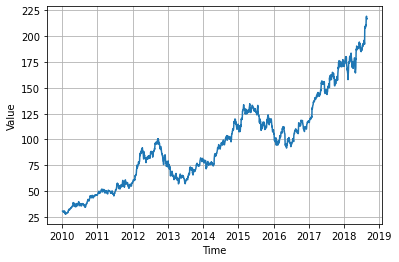

In [54]:
plot_series(days, series)

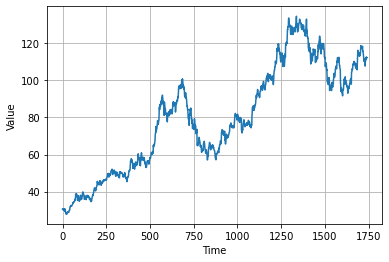

In [55]:
series_train=series[:split_time]
time_train=time[:split_time]
#visualise(series_train)
plot_series( time_train, series_train)

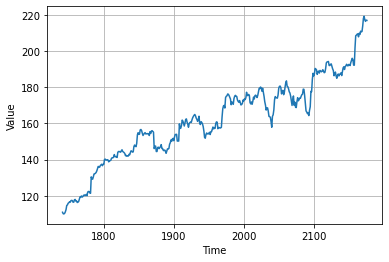

In [56]:
series_valid=series[split_time:]
time_valid=time[split_time:]
#visualise(series_valid)
plot_series(time_valid,series_valid)

In [57]:
def split_data(df, series, time, threshold=0.8):
    split_time= int(df.shape[0]*threshold)
    series_train=series[:split_time]
    time_train=time[:split_time]
    series_valid=series[split_time:]
    time_valid=time[split_time:]
    return series_train, series_valid

In [58]:
train_data, valid_data = split_data(apple_after_2009['high'], series, time )

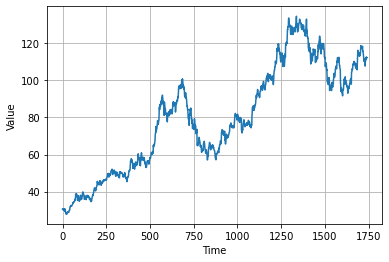

In [59]:
plot_series(time_train, train_data)

In [60]:
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= 50  )

In [61]:
def print_windows(windows):
    for x,y in windows:
        print("x: " , x.numpy())
        print("y: ", y.numpy())

In [62]:
print_windows(train_windows)

x:  [125.76000214 126.37000275 127.15000153 128.57000732 129.61999512]
y:  [132.97000122]
x:  [50.         49.58856964 49.4642868  48.74571609 48.02000046]
y:  [48.72142792]
x:  [120.69000244 121.22000122 121.36000061 123.48999786 123.81999969]
y:  [122.69000244]
x:  [51.39571381 51.09714127 51.42856979 51.65857315 52.1428566 ]
y:  [53.52142715]
x:  [76.39286041 76.34857178 75.99714661 76.19000244 76.96286011]
y:  [76.76428223]
x:  [116.75       118.69000244 117.98000336 117.44000244 118.16999817]
y:  [117.83999634]
x:  [38.92285538 38.26285553 37.7142868  38.57143021 38.65285873]
y:  [38.26856995]
x:  [60.23285675 60.42571259 60.47000122 60.1428566  60.5       ]
y:  [60.68571472]
x:  [36.02428436 36.96857071 37.07571411 37.77000046 38.07428741]
y:  [37.7857132]
x:  [111.59999847 110.16000366 109.83999634 112.65000153 113.23999786]
y:  [113.48999786]
x:  [36.15714264 35.98285675 35.7157135  36.37571335 36.38142776]
y:  [36.2114296]
x:  [116.51999664 114.34999847 111.90000153 108.800003

y:  [37.02142715]
x:  [75.70999908 75.99571228 76.60571289 76.09571075 76.25      ]
y:  [77.2142868]
x:  [78.11428833 77.99428558 77.93714142 78.12285614 77.25714111]
y:  [77.5]
x:  [46.04714203 46.2842865  45.86000061 46.07143021 45.86428452]
y:  [46.43714142]
x:  [55.33428574 54.         54.33285904 55.08571243 55.51571274]
y:  [55.1428566]
x:  [70.9642868  71.08856964 71.97571564 72.79428864 75.18428802]
y:  [72.12714386]
x:  [65.17571259 64.74428558 65.74285889 66.08571625 65.61142731]
y:  [65.63999939]
x:  [78.74143219 78.12714386 76.7142868  76.36714172 75.70285797]
y:  [75.65285492]
x:  [89.40856934 89.97571564 90.98143005 92.02428436 90.69000244]
y:  [91.2485733]
x:  [124.94999695 127.31999969 129.16000366 129.25       128.3999939 ]
y:  [127.84999847]
x:  [94.73999786 95.         94.88999939 97.87999725 97.31999969]
y:  [97.83999634]
x:  [44.69714355 45.74000168 45.65285873 45.681427   45.90000153]
y:  [45.5385704]
x:  [92.13999939 92.45714569 90.76856995 90.73285675 92.9000015

x:  [57.62857056 57.63428497 57.1428566  58.2857132  57.27000046]
y:  [56.74428558]
x:  [77.63999939 77.5        77.14286041 75.84285736 75.16000366]
y:  [75.7842865]
x:  [37.15714264 37.82857132 37.9985733  37.52142715 37.09999847]
y:  [37.51285553]
x:  [129.57000732 127.22000122 124.76999664 124.90000153 125.40000153]
y:  [124.94999695]
x:  [50.33142853 50.92571259 49.69142914 49.         48.51571274]
y:  [48.31428528]
x:  [34.65857315 35.1071434  34.93714142 35.92285538 36.02428436]
y:  [36.96857071]
x:  [40.93999863 40.41428757 41.34999847 41.71285629 41.49714279]
y:  [42.07143021]
x:  [37.02142715 37.12142944 38.25       38.98571396 39.2857132 ]
y:  [39.8585701]
x:  [84.17857361 84.03142548 83.16999817 82.82857513 82.06999969]
y:  [82.39142609]
x:  [129.49000549 130.72000122 130.88000488 130.97999573 131.63000488]
y:  [132.97000122]
x:  [84.94142914 83.11428833 81.32142639 79.04428864 79.31428528]
y:  [76.93000031]
x:  [47.98571396 48.36571503 48.12714386 48.23285675 49.68999863]


x:  [65.38428497 64.16714478 64.51428223 65.01714325 64.50571442]
y:  [64.63428497]
x:  [115.75       116.34999847 117.19999695 116.08000183 114.65000153]
y:  [114.30000305]
x:  [37.12857056 37.40714264 36.62857056 36.54285812 36.70999908]
y:  [36.42428589]
x:  [50.58571243 51.1428566  51.42856979 51.39571381 51.09714127]
y:  [51.42856979]
x:  [68.36428833 70.98714447 70.78142548 69.94857025 69.79428864]
y:  [69.23857117]
x:  [65.30714417 65.33428192 65.25714111 66.12142944 67.23857117]
y:  [67.41285706]
x:  [117.65000153 117.44000244 116.51999664 114.34999847 111.90000153]
y:  [108.80000305]
x:  [105.72000122 105.72000122 108.79000092 113.02999878 115.73000336]
y:  [116.12999725]
x:  [95.98000336 96.32142639 95.14286041 92.50856781 91.4985733 ]
y:  [92.13999939]
x:  [111.72000122 111.31999969 111.08999634 108.87000275 107.80999756]
y:  [107.68000031]
x:  [81.31285858 82.16285706 80.9642868  81.36856842 81.12571716]
y:  [81.5671463]
x:  [36.70999908 36.42428589 35.69714355 36.12857056 

x:  [73.55000305 73.64142609 73.97571564 74.69999695 75.5       ]
y:  [76.48714447]
x:  [46.98571396 47.38428497 47.59285736 47.70000076 48.09999847]
y:  [48.05285645]
x:  [64.15428925 63.2514267  63.0357132  62.44857025 62.32714462]
y:  [62.24285889]
x:  [66.10428619 65.38428497 64.16714478 64.51428223 65.01714325]
y:  [64.50571442]
x:  [72.12714386 72.53857422 73.55000305 73.64142609 73.97571564]
y:  [74.69999695]
x:  [77.25856781 77.41000366 77.63999939 77.5        77.14286041]
y:  [75.84285736]
x:  [99.23999786 99.44000244 98.69999695 97.44999695 96.62000275]
y:  [96.58000183]
x:  [112.         111.75       114.16999817 115.58000183 115.5       ]
y:  [119.23000336]
x:  [98.69999695 97.44999695 96.62000275 96.58000183 95.68000031]
y:  [95.48000336]
x:  [114.19000244 117.27999878 115.69000244 115.73999786 116.86000061]
y:  [117.56999969]
x:  [28.2142849  28.08571434 28.5357151  28.80571365 29.09857178]
y:  [29.18714333]
x:  [57.7114296  58.4642868  57.6771431  57.45857239 55.55571365

x:  [96.88999939 97.65000153 97.69999695 97.66999817 98.98999786]
y:  [99.30000305]
x:  [114.18000031 114.72000122 115.5        116.69000244 114.56999969]
y:  [113.51000214]
x:  [100.08999634  99.38999939  99.30999756 103.08000183 101.11000061]
y:  [101.44000244]
x:  [109.         107.69000244 109.43000031 108.69999695 107.02999878]
y:  [105.37000275]
x:  [115.05000305 117.48999786 119.75       119.91999817 119.73000336]
y:  [119.34999847]
x:  [116.88999939 116.52999878 116.54000092 116.48999786 114.30000305]
y:  [115.37000275]
x:  [50.26142883 50.13571548 50.         49.88571548 49.95571518]
y:  [50.]
x:  [109.09999847 109.31999969 108.75       107.87999725 107.94999695]
y:  [107.44000244]
x:  [105.37000275 105.84999847 102.37000275 100.12999725  99.11000061]
y:  [99.05999756]
x:  [112.77999878 110.44999695 112.55999756 114.01999664 113.27999878]
y:  [114.20999908]
x:  [48.12714386 48.23285675 49.68999863 50.30428696 49.7114296 ]
y:  [49.33285904]
x:  [47.67571259 48.02000046 48.     

x:  [52.12857056 51.46714401 51.3571434  49.34285736 49.23428726]
y:  [49.30714417]
x:  [114.56999969 113.51000214 111.54000092 109.62000275 111.01000214]
y:  [111.37000275]
x:  [ 97.69999695  97.66999817  98.98999786  99.30000305 100.12999725]
y:  [100.]
x:  [108.04000092 110.30000305 109.48999786 109.30000305 108.79000092]
y:  [109.31999969]
x:  [126.08000183 127.62000275 127.55999756 126.87999725 127.19000244]
y:  [128.94999695]
x:  [40.54000092 41.04999924 41.13999939 41.8228569  41.93285751]
y:  [42.10428619]
x:  [77.41000366 77.63999939 77.5        77.14286041 75.84285736]
y:  [75.16000366]
x:  [ 97.66999817  98.98999786  99.30000305 100.12999725 100.        ]
y:  [100.45999908]
x:  [111.01000214 111.37000275 111.73999786 111.76999664 110.19000244]
y:  [112.27999878]
x:  [50.4642868  50.7885704  51.2857132  51.42856979 51.11428452]
y:  [51.35428619]
x:  [88.85713959 87.7142868  85.99428558 86.14286041 85.27857208]
y:  [83.9671402]
x:  [ 99.15000153  97.72000122  99.          99.9

x:  [116.40000153 116.30999756 117.65000153 117.44000244 116.51999664]
y:  [114.34999847]
x:  [75.87571716 81.42857361 81.71286011 85.10713959 85.13999939]
y:  [85.63285828]
x:  [100.56999969 100.00856781 100.72428894  99.30285645  98.96857452]
y:  [96.09857178]
x:  [110.41999817 109.76999664 110.61000061 110.5        112.33999634]
y:  [112.38999939]
x:  [55.34000015 54.81999969 54.87857056 54.97857285 56.58571243]
y:  [56.75714111]
x:  [57.52000046 56.71285629 56.45000076 57.07143021 56.84285736]
y:  [56.22142792]
x:  [29.9285717  30.11857224 29.98142815 30.13142776 31.38571358]
y:  [31.44142914]
x:  [65.25714111 66.12142944 67.23857117 67.41285706 66.7142868 ]
y:  [66.30000305]
x:  [63.31999969 64.15428925 63.2514267  63.0357132  62.44857025]
y:  [62.32714462]
x:  [111.11000061 109.88999939 113.23999786 113.30999756 114.52999878]
y:  [111.87999725]
x:  [32.34999847 32.1428566  32.1771431  32.2857132  32.68285751]
y:  [32.88571548]
x:  [56.45000076 57.07143021 56.84285736 56.22142792 

x:  [56.37571335 55.84857178 56.5        56.29142761 56.27142715]
y:  [56.48571396]
x:  [33.92571259 33.80142975 34.10428619 34.0728569  34.31999969]
y:  [34.56000137]
x:  [63.00571442 64.2842865  65.30714417 65.33428192 65.25714111]
y:  [66.12142944]
x:  [74.69999695 75.5        76.48714447 78.23000336 78.31571198]
y:  [78.11428833]
x:  [54.87857056 54.97857285 56.58571243 56.75714111 57.01856995]
y:  [57.65571594]
x:  [63.05714417 63.00571442 64.2842865  65.30714417 65.33428192]
y:  [65.25714111]
x:  [101.11000061 102.37999725 102.02999878 101.77999878 100.51999664]
y:  [99.15000153]
x:  [100.20999908 100.65000153 100.12000275 101.11000061 102.37999725]
y:  [102.02999878]
x:  [63.38571548 62.59142685 62.46857071 62.1428566  60.70714188]
y:  [61.07143021]
x:  [119.08999634 120.51000214 120.23000336 120.25       119.83999634]
y:  [122.15000153]
x:  [130.41999817 130.63000488 133.13000488 134.53999329 131.58999634]
y:  [128.63999939]
x:  [77.62999725 80.22000122 81.98285675 81.82857513 

x:  [73.75       73.49714661 76.48571777 79.2857132  78.52428436]
y:  [76.94714355]
x:  [54.99571609 54.76714325 54.931427   53.23571396 52.42856979]
y:  [52.12571335]
x:  [49.96714401 50.33142853 50.92571259 49.69142914 49.        ]
y:  [48.51571274]
x:  [ 99.95999908 103.01999664 104.11000061 105.05000305 105.48999786]
y:  [105.48000336]
x:  [43.20999908 45.         45.57143021 44.82428741 44.8928566 ]
y:  [44.96285629]
x:  [74.76856995 74.34571075 74.45857239 74.59428406 75.12428284]
y:  [76.59143066]
x:  [57.7857132  57.52000046 56.71285629 56.45000076 57.07143021]
y:  [56.84285736]
x:  [36.87714386 36.8928566  35.22428513 36.37857056 37.12714386]
y:  [37.59000015]
x:  [59.24000168 59.79285812 60.3928566  61.1071434  60.8571434 ]
y:  [60.40714264]
x:  [113.02999878 115.73000336 116.12999725 116.18000031 114.12000275]
y:  [113.98999786]
x:  [118.06999969 117.41999817 116.81999969 115.56999969 114.23999786]
y:  [115.05000305]
x:  [126.48999786 125.12000275 125.55999756 127.51000214 1

In [63]:
print_windows(train_batch)

x:  [[ 76.09571075  76.25        77.2142868   77.9642868   78.42857361]
 [ 32.53285599  32.2142868   32.13999939  32.34999847  32.1428566 ]
 [ 66.54856873  65.25714111  64.54571533  63.38571548  62.59142685]
 [ 91.72285461  90.25285339  90.76856995  90.55714417  89.50714111]
 [130.41999817 130.63000488 133.13000488 134.53999329 131.58999634]
 [ 36.          34.7142868   34.85571289  35.1071434   34.65857315]
 [ 36.38142776  36.2114296   36.27428436  36.          34.7142868 ]
 [ 79.91999817  78.77857208  78.57142639  78.80142975  81.53142548]
 [ 96.47000122  95.40000153  95.66000366  96.5         96.88999939]
 [ 74.52428436  74.84571075  74.60713959  75.61142731  75.58428192]
 [ 38.32571411  38.45285797  38.62571335  39.52428436  39.70857239]
 [ 36.96857071  37.07571411  37.77000046  38.07428741  37.7857132 ]
 [111.72000122 111.31999969 111.08999634 108.87000275 107.80999756]
 [ 32.2142868   32.53285599  32.2142868   32.13999939  32.34999847]
 [ 57.01856995  57.65571594  58.44142914  58

## Split data into training validation and test set

## 1.MVA 

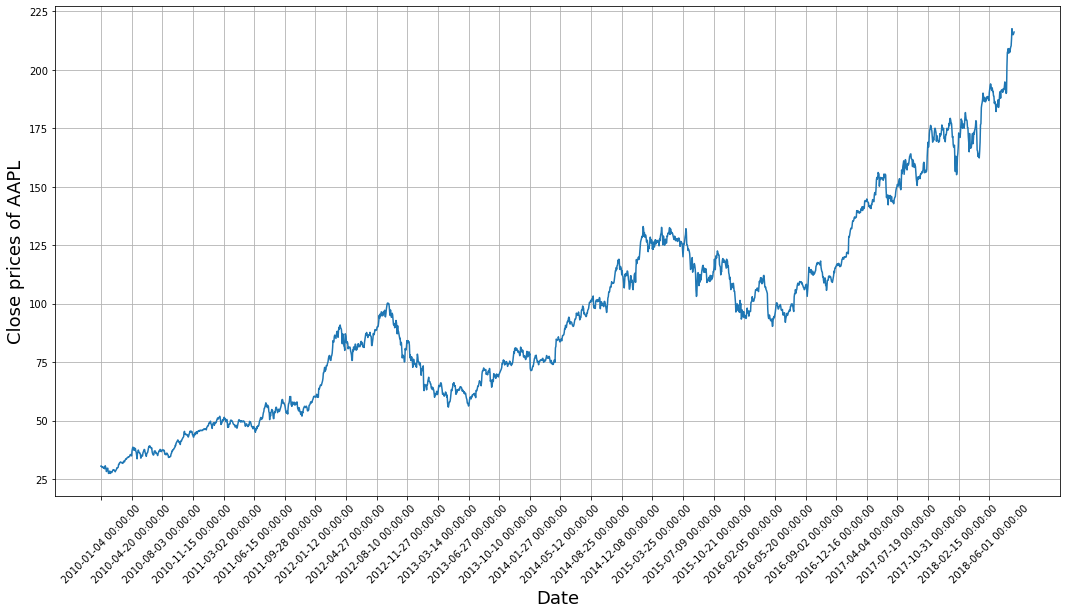

In [117]:
visualise(apple_after_2009,  img_name='close.png', attribute='close', nof_datepts=30)

## 2. Linear Regression

In [64]:
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [65]:
#clear
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [66]:
#Introduce parameters
window_size=30
batch_size=64
nof_epochs=100
lr_rate=1e-6
mom=0.9

In [67]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 30, batch_size= 64 )

In [68]:
#Introduce model
linear_regression= kr.layers.Dense(1, input_shape=[window_size])#single layer with one neuron
model= kr.models.Sequential(linear_regression)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [69]:
#Choose mse loss function and sgd optimizer
model.compile(loss="mse", optimizer=kr.optimizers.SGD(lr=lr_rate, momentum=mom))

In [70]:
history=model.fit(train_batch, epochs= nof_epochs)

Epoch 1/100
27/27 [==============================] - 0s 17ms/step - loss: 836.4819
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 72.7179
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 22.5052
Epoch 4/100
27/27 [==============================] - 0s 5ms/step - loss: 15.7520
Epoch 5/100
27/27 [==============================] - 0s 5ms/step - loss: 15.1453
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 13.5088
Epoch 7/100
27/27 [==============================] - 0s 6ms/step - loss: 13.2361
Epoch 8/100
27/27 [==============================] - 0s 5ms/step - loss: 12.0362
Epoch 9/100
27/27 [==============================] - 0s 5ms/step - loss: 10.7358
Epoch 10/100
27/27 [==============================] - 0s 6ms/step - loss: 9.9217
Epoch 11/100
27/27 [==============================] - 0s 6ms/step - loss: 9.8050
Epoch 12/100
27/27 [==============================] - 0s 6ms/step - loss: 9.7626
Epoch 13/100
27/27 [======

Text(0.5, 0, 'epoch')

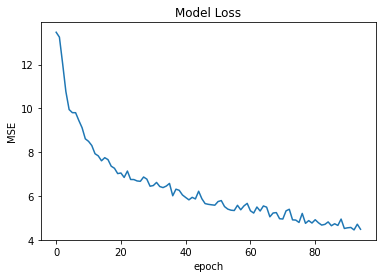

In [71]:
plt.plot(history.history["loss"][5:])
plt.title('Model Loss')
plt.ylabel('MSE')
plt.xlabel('epoch')

In [72]:
print("Parameters")
print(linear_regression.get_weights())

Parameters
[array([[ 0.04475522],
       [ 0.16334645],
       [-0.10356429],
       [ 0.14011073],
       [ 0.24552396],
       [-0.36744216],
       [-0.29015094],
       [ 0.12420978],
       [ 0.07236712],
       [-0.22190566],
       [ 0.19842285],
       [-0.07917473],
       [ 0.20522656],
       [ 0.01545271],
       [-0.2517704 ],
       [-0.36585474],
       [ 0.13671286],
       [ 0.12076816],
       [ 0.23642652],
       [ 0.28494954],
       [-0.42609918],
       [-0.11433572],
       [ 0.25607413],
       [ 0.05070537],
       [-0.10971183],
       [ 0.13437025],
       [ 0.09592293],
       [ 0.35412848],
       [ 0.10711105],
       [ 0.33665314]], dtype=float32), array([0.0028635], dtype=float32)]


In [73]:
def compute_predicted(model, series, split_time, window_size):
    predicted_all=[]
    for t in range(len(series)-window_size):
        predicted_all.append(model.predict(series[t:t+window_size][np.newaxis]))
        
    predicted_valid=predicted_all[split_time-window_size:]
    predicted=np.array(predicted_valid)[:, 0, 0]
    return predicted

In [74]:
len(series_valid)

436

In [75]:
series_valid

array([110.94000244, 110.08999634, 110.02999878, 110.36000061,
       111.19000244, 112.43000031, 114.69999695, 115.        ,
       115.91999817, 116.19999695, 116.73000336, 116.5       ,
       117.37999725, 117.5       , 117.40000153, 116.51000214,
       116.51999664, 117.80000305, 118.01999664, 117.11000061,
       117.19999695, 116.33000183, 116.51000214, 116.86000061,
       118.16000366, 119.43000031, 119.37999725, 119.93000031,
       119.30000305, 119.62000275, 120.23999786, 120.5       ,
       120.08999634, 120.44999695, 120.80999756, 120.09999847,
       122.09999847, 122.44000244, 122.34999847, 121.62999725,
       121.38999939, 130.49000549, 129.38999939, 129.19000244,
       130.5       , 132.08999634, 132.22000122, 132.44999695,
       132.94000244, 133.82000732, 135.08999634, 136.27000427,
       135.8999939 , 135.83000183, 136.75      , 137.11999512,
       137.47999573, 136.66000366, 137.44000244, 137.44000244,
       140.1499939 , 140.27999878, 139.83000183, 139.77

In [76]:
first_window=series[split_time-window_size:split_time]#from training data to predict first value of test data
print(first_window)
    

[117.76000214 117.37999725 116.91000366 117.73999786 118.36000061
 115.69999695 115.86000061 115.20999908 114.23000336 113.76999664
 112.34999847 111.45999908 110.25       110.51000214 111.72000122
 111.31999969 111.08999634 108.87000275 107.80999756 107.68000031
 110.23000336 110.34999847 110.54000092 111.98999786 112.41999817
 111.51000214 111.87000275 112.47000122 112.02999878 112.19999695]


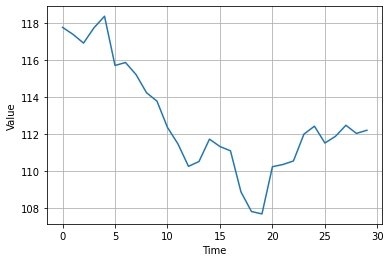

In [77]:
plot_series(np.array(range(30)), first_window)

In [78]:
print("first actual value of test is ", series_valid[0])
print("first predicted value is" , model.predict(first_window[np.newaxis])[0][0])

first actual value of test is  110.94000244140601
first predicted value is 109.93243


In [79]:
last_window=series[len(series)-1-window_size:len(series)-1]#from training data to predict first value of test data
print(last_window)

[191.83999634 192.6499939  191.86999512 191.80000305 192.55000305
 192.42999268 191.96000671 193.66000366 194.8500061  195.96000671
 195.19000244 192.19999695 192.13999939 201.75999451 208.38000488
 208.74000549 209.25       209.5        207.80999756 209.77999878
 209.1000061  210.94999695 210.55999756 210.74000549 213.80999756
 217.94999695 219.17999268 217.19000244 216.36000061 217.05000305]


In [80]:
print("last actual value of test is ", series_valid[-1])
print("last predicted value is" , model.predict(last_window[np.newaxis])[0][0])

last actual value of test is  216.899993896484
last predicted value is 214.04791


In [81]:
def point_prediction(model, series, split_time, window_size, window_shift=1):
    predicted_test=[]
    for t in range(split_time-window_size, len(series)-window_size, window_shift):
        predicted_test.append(model.predict(series[t:t+window_size][np.newaxis]))
        
    predicted_test=np.array(predicted_test)[:, 0, 0]
    return predicted_test


In [82]:
point_predicted=point_prediction(model, series, split_time, window_size)

In [83]:
print(point_predicted[0])
point_predicted[-1]


109.93243


214.04791

In [84]:
len(point_predicted)

436

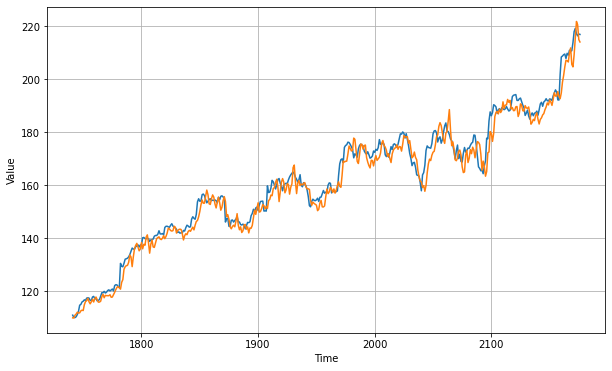

In [85]:
plt.figure(figsize=(10, 6))

plot_series(time[split_time:], valid_data[:])
plot_series(time[split_time:], point_predicted[:])

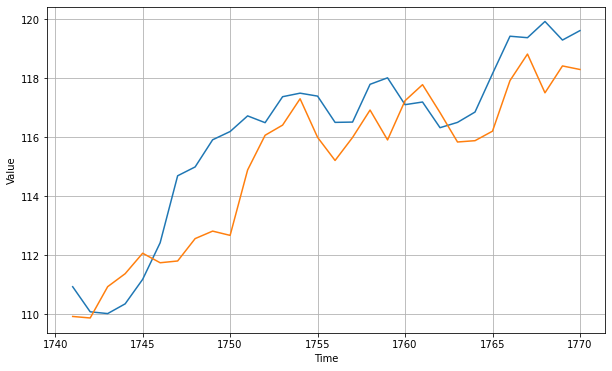

In [86]:
plt.figure(figsize=(10, 6))

plot_series(time[split_time:split_time+window_size], valid_data[:window_size])
plot_series(time[split_time:split_time+window_size], point_predicted[:window_size])

In [87]:
kr.metrics.mean_squared_error(valid_data, point_predicted).numpy()

14.42126

In [88]:
kr.metrics.mean_absolute_error(valid_data, point_predicted).numpy()

2.9065828

In [89]:
a=[1,2,2]

In [90]:
a=np.append(a, 3)

In [91]:
a

array([1, 2, 2, 3])

In [92]:
a=np.delete(a, [0])

In [93]:
a

array([2, 2, 3])

In [94]:
def predict_next_n_days(n, model, series, split_time, window_size):
    predicted_test=[]
    window=series[split_time-window_size:split_time]
    if n> len(series[split_time:]):
        print("Try with n values lower than ", len(series[split_time:])-1 )
    else:
        for i in range(n):
            predicted=model.predict(window[np.newaxis])[0][0]
            predicted_test.append(predicted)
            window= np.delete(window, [0])
            window= np.append(window, predicted)
    
    #predicted_test=np.array(predicted_test)[:, 0, 0]
    return predicted_test

In [95]:
predicted_n_days=predict_next_n_days(365, model, series, split_time, window_size)

In [96]:
len(predicted_n_days)

365

In [97]:
predicted_n_days

[109.93243,
 109.54188,
 110.6496,
 111.17485,
 112.12519,
 112.18629,
 112.215385,
 112.21012,
 111.378654,
 109.99181,
 111.65053,
 111.647064,
 110.97863,
 111.22008,
 109.687386,
 109.48716,
 110.56515,
 109.724815,
 108.33514,
 108.79061,
 107.50092,
 106.62405,
 106.33349,
 105.86062,
 107.72251,
 107.68944,
 105.49549,
 105.232025,
 105.358025,
 103.98146,
 104.315636,
 103.256996,
 102.440544,
 103.67176,
 101.48052,
 100.40287,
 102.35153,
 101.84472,
 100.98998,
 101.368645,
 99.1905,
 99.21187,
 100.26049,
 98.42301,
 99.365456,
 99.76717,
 98.120186,
 98.886734,
 97.9119,
 96.032166,
 98.669174,
 98.13441,
 95.49729,
 96.958336,
 96.04793,
 95.822624,
 97.47255,
 95.171974,
 95.63995,
 98.0088,
 94.258675,
 93.60865,
 95.92987,
 93.988594,
 95.053566,
 94.97535,
 92.22385,
 94.85489,
 94.41391,
 91.24206,
 94.471054,
 93.73061,
 91.0722,
 94.02825,
 91.44308,
 90.06731,
 94.06349,
 91.30164,
 90.56328,
 92.936005,
 88.896866,
 90.34045,
 92.55265,
 87.05309,
 89.91494,
 92.

In [98]:
n=365

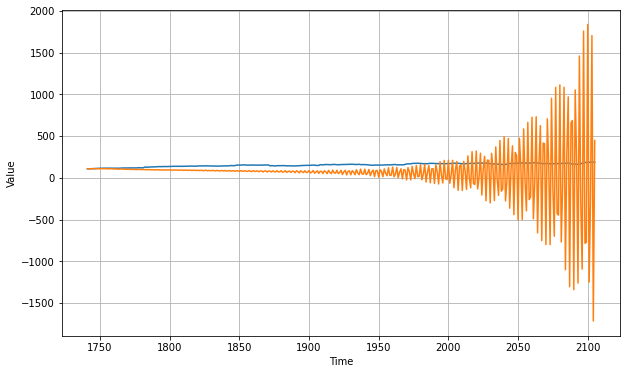

In [99]:
plt.figure(figsize=(10, 6))

plot_series(time[split_time:split_time+n], valid_data[:n])
plot_series(time[split_time:split_time+n], predict_next_n_days(n, model, series, split_time, window_size))

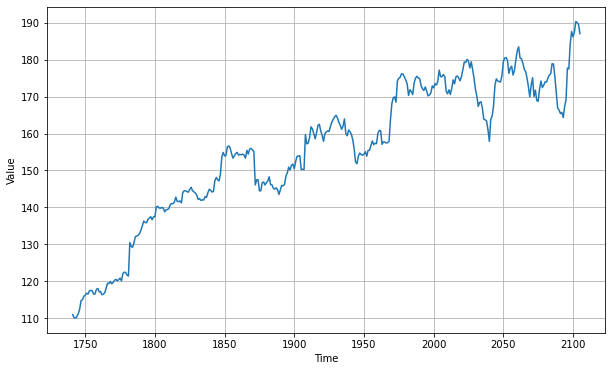

In [100]:
plt.figure(figsize=(10, 6))

plot_series(time[split_time:split_time+n], valid_data[:n])
#plot_series(time[split_time:split_time+n], predicted_n_days)

In [103]:
kr.metrics.mean_squared_error(valid_data[:365], predicted_n_days).numpy()

128584.836

In [ ]:
kr.metrics.mean_absolute_error(valid_data, predicted_n_days).numpy()

## 3. DNN


In [ ]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [ ]:
#Introduce parameters
window_size=5
batch_size=50
nof_epochs=100
lr_rate=1e-6
mom=0.9

In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= 50 )

In [ ]:
dnn = kr.Sequential()

dnn.add(kr.layers.Dense(units=10,  input_shape=[window_size], activation='relu'))#input layer with relu activation

dnn.add(kr.layers.Dense(units=10, activation='relu'))#hidden layer with relu activation

dnn.add(kr.layers.Dense(1))#output layer

dnn.summary()

In [ ]:
dnn.compile(loss="mse", optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom))

In [ ]:
history_dnn= dnn.fit(train_batch, epochs=nof_epochs)

In [131]:
def plot_mse(model_history):
    plt.plot(model_history.history["loss"][5:])
    plt.title('Model Loss')
    plt.ylabel('MSE')
    plt.xlabel('epoch')

In [ ]:
plot_mse(history_dnn)

In [ ]:
predicted = compute_predicted(dnn, series, 1741, window_size)

In [183]:
def plot_two(time, split_time, valid_data, predicted):
    plt.figure(figsize=(18, 9))

    plot_series(time[split_time:], valid_data)
    plot_series(time[split_time:], predicted)
    
    
#plot_two(days, split_time, valid_data, predicted)

In [ ]:
kr.metrics.mean_squared_error(valid_data, predicted).numpy()

In [ ]:
kr.metrics.mean_absolute_error(valid_data, predicted).numpy()

### DNN with callback 

In [ ]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [ ]:
#Introduce parameters
window_size=5
batch_size=50
nof_epochs=100
lr_rate=1e-8
mom=0.9

In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= 50 )

In [ ]:
dnn_callback = kr.Sequential()

dnn_callback.add(kr.layers.Dense(units=10,  input_shape=[window_size], activation='relu'))#input layer with relu activation

dnn_callback.add(kr.layers.Dense(units=10, activation='relu'))#hidden layer with relu activation

dnn_callback.add(kr.layers.Dense(1))#output layer

dnn_callback.summary()

In [ ]:
dnn_callback.compile(loss="mse", optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom))

In [ ]:
lr_optimizer = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [ ]:
history_dnn_callback= dnn_callback.fit(train_batch, epochs=100, callbacks=[lr_optimizer], verbose=0)

In [ ]:
#plot mse across lr
lrs = lr_rate * (10 ** (np.arange(100) / 20))
plt.semilogx(lrs, history_dnn_callback.history["loss"])
plt.axis([1e-8, 1e-3, 0, 300])

In [ ]:
#Choose 1e-6

### Apply better learning rate

In [ ]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [ ]:
#Introduce parameters
window_size=5
batch_size=50
nof_epochs=100
lr_rate=1e-6
mom=0.9
split_time=1741

In [ ]:
lr_rate=1e-5

In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= 50 )

In [ ]:
dnn_last = kr.Sequential()

dnn_last.add(kr.layers.Dense(units=10,  input_shape=[window_size], activation='relu'))#input layer with relu activation

dnn_last.add(kr.layers.Dense(units=10, activation='relu'))#hidden layer with relu activation

dnn_last.add(kr.layers.Dense(1))#output layer

dnn_last.summary()

In [ ]:
dnn_last.compile(loss="mse", optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom))

In [ ]:
history_dnn_last= dnn_last.fit(train_batch, epochs=500,verbose=0)

In [ ]:
plot_mse(history_dnn_last)

In [ ]:
predicted_dnn_last=compute_predicted(dnn_last, series, split_time, window_size)

In [ ]:
plot_two(days, split_time, valid_data, predicted_dnn_last)

In [ ]:
kr.metrics.mean_squared_error(valid_data, predicted_dnn_last).numpy()

In [ ]:
kr.metrics.mean_absolute_error(valid_data, predicted_dnn_last).numpy()

## 4.RNN

## Univariate analysis

### Choose better learning rate with callback

In [ ]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [ ]:
#Introduce parameters
window_size=5
batch_size=128 #2^n sth
nof_epochs=100
lr_rate=1e-8
mom=0.9
split_time=1741

In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= batch_size )

In [ ]:
rnn_callback = kr.Sequential()

rnn_callback.add(kr.layers.Lambda(lambda data : tf.expand_dims(data, axis=-1), input_shape=[None]))#preprocess the input dim for univariate

rnn_callback.add(kr.layers.SimpleRNN(units=40, return_sequences=True))#hidden layer with relu activation

rnn_callback.add(kr.layers.SimpleRNN(units=40, return_sequences=False))#hidden layer with relu activation

rnn_callback.add(kr.layers.Dense(1))#output layer

rnn_callback.add(kr.layers.Lambda(lambda x:  100.0*x ))#scaling 

rnn_callback.summary()

In [ ]:
rnn_callback.compile(loss=kr.losses.Huber(), optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics=["mae", "mse"])

In [121]:
lr_optimizer = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

In [ ]:
history_rnn_callback= rnn_callback.fit(train_batch, epochs=100, callbacks=[lr_optimizer], verbose=0)

In [ ]:
#plot mse across lr
plt.semilogx(history_rnn_callback.history["lr"], history_rnn_callback.history["loss"])
plt.axis([1e-8, 1e-3, 0, 30])

In [ ]:
#Choose lr= 5e-7
lr_rate=5e-7

In [ ]:
#clear
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= batch_size )

In [ ]:
rnn = kr.Sequential()

rnn.add(kr.layers.Lambda(lambda data : tf.expand_dims(data, axis=-1), input_shape=[None]))#preprocess the input dim for univariate

rnn.add(kr.layers.SimpleRNN(units=40, return_sequences=True))#hidden layer with relu activation

rnn.add(kr.layers.SimpleRNN(units=40, return_sequences=False))#hidden layer with relu activation

rnn.add(kr.layers.Dense(1))#output layer

rnn.add(kr.layers.Lambda(lambda x:  100.0*x ))#scaling 

rnn.summary()

In [ ]:
rnn.compile(loss=kr.losses.Huber(), optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics=["mae", "mse"])

In [ ]:
history_rnn= rnn.fit(train_batch, epochs=500)

In [ ]:
plot_mse(history_rnn)

In [ ]:
#try with 400 epochs 
epc=400

In [ ]:
#clear
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)


In [ ]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= 5, batch_size= batch_size )

In [ ]:
rnn = kr.Sequential()

rnn.add(kr.layers.Lambda(lambda data : tf.expand_dims(data, axis=-1), input_shape=[None]))#preprocess the input dim for univariate

rnn.add(kr.layers.SimpleRNN(units=40, return_sequences=True))#hidden layer with relu activation

rnn.add(kr.layers.SimpleRNN(units=40, return_sequences=False))#hidden layer with relu activation

rnn.add(kr.layers.Dense(1))#output layer

rnn.add(kr.layers.Lambda(lambda x:  100.0*x ))#scaling 

rnn.summary()

In [ ]:
rnn.compile(loss=kr.losses.Huber(), optimizer= kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics=["mae", "mse"])

In [ ]:
history_rnn= rnn.fit(train_batch, epochs=epc)

In [ ]:
plot_mse(history_rnn)

In [ ]:
predicted_rnn=compute_predicted(rnn, series, split_time, window_size)

In [ ]:
plot_two(days, split_time, valid_data, predicted_rnn)

In [ ]:
kr.metrics.mean_squared_error(valid_data, predicted_rnn).numpy()

In [ ]:
kr.metrics.mean_absolute_error(valid_data, predicted_rnn).numpy()

## Multivariate analysis

## 5.LSTM

In [152]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [153]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [154]:
#Introduce parameters
window_size=90
n=90
batch_size=128 #2^n sth
nof_epochs=100
lr_rate=1e-6
mom=0.9
split_time=1741

In [155]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= window_size, batch_size= batch_size )

In [156]:
lstm = kr.Sequential()

lstm.add(kr.layers.Lambda(lambda data : tf.expand_dims(data, axis=-1), input_shape=[None]))#preprocess the input dim for univariate

lstm.add(kr.layers.Bidirectional(kr.layers.LSTM(32, return_sequences=True)))#hidden layer with relu activation

lstm.add(kr.layers.Bidirectional(kr.layers.LSTM(32, return_sequences=False)))#hidden layer with relu activation

lstm.add(kr.layers.Dense(1))#output layer

lstm.add(kr.layers.Lambda(lambda x:  100.0*x ))#scaling 

lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          8704      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [157]:
# Compiling 
lstm.compile(loss = kr.losses.Huber(), optimizer=kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics = ["mae", "mse"])

In [158]:
history_lstm= lstm.fit(train_batch, callbacks=[lr_optimizer], epochs=nof_epochs)

Epoch 1/100
13/13 [==============================] - 5s 365ms/step - loss: 56.4660 - mae: 56.9792 - mse: 3976.6968
Epoch 2/100
13/13 [==============================] - 2s 124ms/step - loss: 56.1558 - mae: 56.6436 - mse: 3937.6548
Epoch 3/100
13/13 [==============================] - 2s 124ms/step - loss: 55.6700 - mae: 56.1682 - mse: 3882.8618
Epoch 4/100
13/13 [==============================] - 2s 118ms/step - loss: 55.1275 - mae: 55.6128 - mse: 3819.5771
Epoch 5/100
13/13 [==============================] - 2s 125ms/step - loss: 54.4884 - mae: 54.9841 - mse: 3748.5635
Epoch 6/100
13/13 [==============================] - 2s 118ms/step - loss: 53.7948 - mae: 54.2701 - mse: 3669.4421
Epoch 7/100
13/13 [==============================] - 2s 125ms/step - loss: 52.9635 - mae: 53.4456 - mse: 3580.4487
Epoch 8/100
13/13 [==============================] - 2s 127ms/step - loss: 51.9757 - mae: 52.4560 - mse: 3475.8032
Epoch 9/100
13/13 [==============================] - 2s 130ms/step - loss: 50.65

13/13 [==============================] - 2s 141ms/step - loss: 7.1597 - mae: 7.6619 - mse: 93.7211
Epoch 73/100
13/13 [==============================] - 2s 144ms/step - loss: 5.4725 - mae: 5.9643 - mse: 59.3819
Epoch 74/100
13/13 [==============================] - 2s 146ms/step - loss: 5.6076 - mae: 6.0831 - mse: 60.0610
Epoch 75/100
13/13 [==============================] - 2s 143ms/step - loss: 5.7587 - mae: 6.2251 - mse: 67.7645
Epoch 76/100
13/13 [==============================] - 2s 145ms/step - loss: 5.9374 - mae: 6.4041 - mse: 65.8056
Epoch 77/100
13/13 [==============================] - 2s 140ms/step - loss: 13.9126 - mae: 14.3826 - mse: 308.1013
Epoch 78/100
13/13 [==============================] - 2s 145ms/step - loss: 15.6807 - mae: 16.1198 - mse: 389.4347
Epoch 79/100
13/13 [==============================] - 2s 148ms/step - loss: 11.5426 - mae: 12.0711 - mse: 224.6750
Epoch 80/100
13/13 [==============================] - 2s 145ms/step - loss: 13.6812 - mae: 14.1433 - mse: 27

(1e-08, 0.001, 0.0, 30.0)

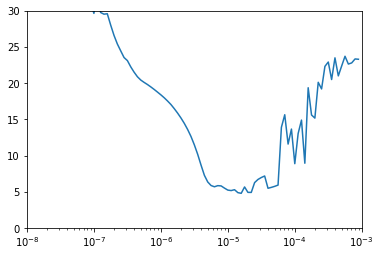

In [160]:
#plot mse across lr
plt.semilogx(history_lstm.history["lr"], history_lstm.history["loss"])
plt.axis([1e-8, 1e-3, 0, 30])

In [167]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [168]:
lr_rate=1e-5

In [169]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= window_size, batch_size= batch_size )

In [170]:
lstm = kr.Sequential()

lstm.add(kr.layers.Lambda(lambda data : tf.expand_dims(data, axis=-1), input_shape=[None]))#preprocess the input dim for univariate

lstm.add(kr.layers.Bidirectional(kr.layers.LSTM(32, return_sequences=True)))#hidden layer with relu activation

lstm.add(kr.layers.Bidirectional(kr.layers.LSTM(32, return_sequences=False)))#hidden layer with relu activation

lstm.add(kr.layers.Dense(1))#output layer

lstm.add(kr.layers.Lambda(lambda x:  100.0*x ))#scaling 

lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          8704      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
lambda_1 (Lambda)            (None, 1)                 0         
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [171]:
# Compiling 
lstm.compile(loss = kr.losses.Huber(), optimizer=kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics = ["mae", "mse"])

In [172]:
history_lstm= lstm.fit(train_batch, epochs=5*nof_epochs)

Epoch 1/500
13/13 [==============================] - 5s 366ms/step - loss: 32.8211 - mae: 33.3936 - mse: 1717.4407
Epoch 2/500
13/13 [==============================] - 2s 136ms/step - loss: 22.7089 - mae: 23.2227 - mse: 781.5695
Epoch 3/500
13/13 [==============================] - 2s 139ms/step - loss: 18.2911 - mae: 18.7885 - mse: 489.2131
Epoch 4/500
13/13 [==============================] - 2s 142ms/step - loss: 15.8773 - mae: 16.3847 - mse: 372.8663
Epoch 5/500
13/13 [==============================] - 2s 143ms/step - loss: 12.7042 - mae: 13.2068 - mse: 247.2014
Epoch 6/500
13/13 [==============================] - 2s 141ms/step - loss: 8.9360 - mae: 9.4306 - mse: 142.2084
Epoch 7/500
13/13 [==============================] - 2s 151ms/step - loss: 6.0139 - mae: 6.4952 - mse: 77.6590
Epoch 8/500
13/13 [==============================] - 2s 146ms/step - loss: 5.2496 - mae: 5.7234 - mse: 57.3395
Epoch 9/500
13/13 [==============================] - 2s 150ms/step - loss: 5.2053 - mae: 5.6836

13/13 [==============================] - 2s 173ms/step - loss: 2.1361 - mae: 2.5855 - mse: 11.6721
Epoch 75/500
13/13 [==============================] - 2s 172ms/step - loss: 2.3604 - mae: 2.8106 - mse: 13.5870
Epoch 76/500
13/13 [==============================] - 2s 179ms/step - loss: 2.2806 - mae: 2.7404 - mse: 12.9707
Epoch 77/500
13/13 [==============================] - 2s 170ms/step - loss: 2.3206 - mae: 2.7741 - mse: 13.1597
Epoch 78/500
13/13 [==============================] - 2s 166ms/step - loss: 1.9093 - mae: 2.3571 - mse: 9.9080
Epoch 79/500
13/13 [==============================] - 2s 164ms/step - loss: 1.8683 - mae: 2.3124 - mse: 9.3940
Epoch 80/500
13/13 [==============================] - 2s 167ms/step - loss: 2.6493 - mae: 3.1135 - mse: 16.3558
Epoch 81/500
13/13 [==============================] - 2s 171ms/step - loss: 4.3633 - mae: 4.8579 - mse: 37.2937
Epoch 82/500
13/13 [==============================] - 2s 163ms/step - loss: 2.3462 - mae: 2.8086 - mse: 13.7899
Epoch 8

Epoch 147/500
13/13 [==============================] - 2s 163ms/step - loss: 1.7645 - mae: 2.2152 - mse: 8.6709
Epoch 148/500
13/13 [==============================] - 2s 180ms/step - loss: 2.3705 - mae: 2.8292 - mse: 14.0134
Epoch 149/500
13/13 [==============================] - 2s 169ms/step - loss: 1.5869 - mae: 2.0241 - mse: 7.4911
Epoch 150/500
13/13 [==============================] - 2s 177ms/step - loss: 3.3746 - mae: 3.8480 - mse: 25.3322
Epoch 151/500
13/13 [==============================] - 2s 179ms/step - loss: 2.0787 - mae: 2.5224 - mse: 11.1397
Epoch 152/500
13/13 [==============================] - 2s 185ms/step - loss: 2.8648 - mae: 3.3434 - mse: 18.6747
Epoch 153/500
13/13 [==============================] - 2s 183ms/step - loss: 1.8796 - mae: 2.3230 - mse: 9.7583
Epoch 154/500
13/13 [==============================] - 2s 180ms/step - loss: 2.0201 - mae: 2.4665 - mse: 10.9317
Epoch 155/500
13/13 [==============================] - 2s 184ms/step - loss: 1.5596 - mae: 1.9990 -

13/13 [==============================] - 2s 166ms/step - loss: 1.8352 - mae: 2.2743 - mse: 9.0312
Epoch 220/500
13/13 [==============================] - 2s 167ms/step - loss: 1.6027 - mae: 2.0472 - mse: 7.2416
Epoch 221/500
13/13 [==============================] - 2s 167ms/step - loss: 1.5790 - mae: 2.0220 - mse: 7.0913
Epoch 222/500
13/13 [==============================] - 2s 186ms/step - loss: 1.7917 - mae: 2.2411 - mse: 8.6538
Epoch 223/500
13/13 [==============================] - 2s 174ms/step - loss: 1.7517 - mae: 2.1992 - mse: 8.3774
Epoch 224/500
13/13 [==============================] - 2s 169ms/step - loss: 1.6599 - mae: 2.1030 - mse: 7.6672
Epoch 225/500
13/13 [==============================] - 2s 174ms/step - loss: 1.4481 - mae: 1.8879 - mse: 6.2271
Epoch 226/500
13/13 [==============================] - 2s 161ms/step - loss: 1.4420 - mae: 1.8708 - mse: 6.3604
Epoch 227/500
13/13 [==============================] - 2s 173ms/step - loss: 1.9141 - mae: 2.3562 - mse: 9.4272
Epoch 

13/13 [==============================] - 2s 161ms/step - loss: 1.2972 - mae: 1.7244 - mse: 5.5022
Epoch 292/500
13/13 [==============================] - 2s 165ms/step - loss: 1.7962 - mae: 2.2422 - mse: 8.6574
Epoch 293/500
13/13 [==============================] - 2s 158ms/step - loss: 1.9494 - mae: 2.4044 - mse: 10.1120
Epoch 294/500
13/13 [==============================] - 2s 165ms/step - loss: 2.3825 - mae: 2.8526 - mse: 13.4704
Epoch 295/500
13/13 [==============================] - 2s 166ms/step - loss: 1.3832 - mae: 1.8172 - mse: 6.0479
Epoch 296/500
13/13 [==============================] - 2s 165ms/step - loss: 1.4395 - mae: 1.8719 - mse: 6.4330
Epoch 297/500
13/13 [==============================] - 2s 167ms/step - loss: 1.5216 - mae: 1.9611 - mse: 6.7965
Epoch 298/500
13/13 [==============================] - 2s 156ms/step - loss: 1.7342 - mae: 2.1822 - mse: 8.3100
Epoch 299/500
13/13 [==============================] - 2s 164ms/step - loss: 2.6363 - mae: 3.1005 - mse: 15.5289
Epo

13/13 [==============================] - 2s 167ms/step - loss: 1.2959 - mae: 1.7263 - mse: 5.4853
Epoch 365/500
13/13 [==============================] - 2s 154ms/step - loss: 1.3741 - mae: 1.8122 - mse: 5.7003
Epoch 366/500
13/13 [==============================] - 2s 160ms/step - loss: 1.8340 - mae: 2.2773 - mse: 8.9429
Epoch 367/500
13/13 [==============================] - 2s 162ms/step - loss: 2.4482 - mae: 2.9153 - mse: 14.1036
Epoch 368/500
13/13 [==============================] - 2s 162ms/step - loss: 1.6102 - mae: 2.0521 - mse: 7.4662
Epoch 369/500
13/13 [==============================] - 2s 162ms/step - loss: 1.3442 - mae: 1.7699 - mse: 5.7652
Epoch 370/500
13/13 [==============================] - 2s 153ms/step - loss: 1.5014 - mae: 1.9388 - mse: 6.7746
Epoch 371/500
13/13 [==============================] - 2s 163ms/step - loss: 1.3436 - mae: 1.7724 - mse: 5.6046
Epoch 372/500
13/13 [==============================] - 2s 164ms/step - loss: 1.4612 - mae: 1.8962 - mse: 6.3090
Epoch

13/13 [==============================] - 2s 152ms/step - loss: 2.3318 - mae: 2.8013 - mse: 12.4928
Epoch 438/500
13/13 [==============================] - 2s 171ms/step - loss: 2.1835 - mae: 2.6302 - mse: 11.9188
Epoch 439/500
13/13 [==============================] - 2s 164ms/step - loss: 2.0910 - mae: 2.5477 - mse: 10.6219
Epoch 440/500
13/13 [==============================] - 2s 161ms/step - loss: 1.9455 - mae: 2.4036 - mse: 9.8187
Epoch 441/500
13/13 [==============================] - 2s 165ms/step - loss: 1.3112 - mae: 1.7345 - mse: 5.5665
Epoch 442/500
13/13 [==============================] - 2s 155ms/step - loss: 1.3923 - mae: 1.8250 - mse: 6.1264
Epoch 443/500
13/13 [==============================] - 2s 165ms/step - loss: 1.2165 - mae: 1.6397 - mse: 4.9568
Epoch 444/500
13/13 [==============================] - 2s 170ms/step - loss: 1.2535 - mae: 1.6830 - mse: 5.0357
Epoch 445/500
13/13 [==============================] - 2s 162ms/step - loss: 1.2393 - mae: 1.6655 - mse: 5.1127
Epo

In [ ]:
'''
history = model.fit(X, Y, epochs=100, validation_split=0.33)
history = model.fit(X, Y, epochs=100, validation_data=(valX, valY))
print("Evaluating model...")
    score = model.evaluate(data.x_test, data.y_test, verbose=0)
    print('Test accuracy:', score[1])
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(loss))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
'''

In [173]:
predicted_lstm=compute_predicted(lstm, series, split_time, window_size)

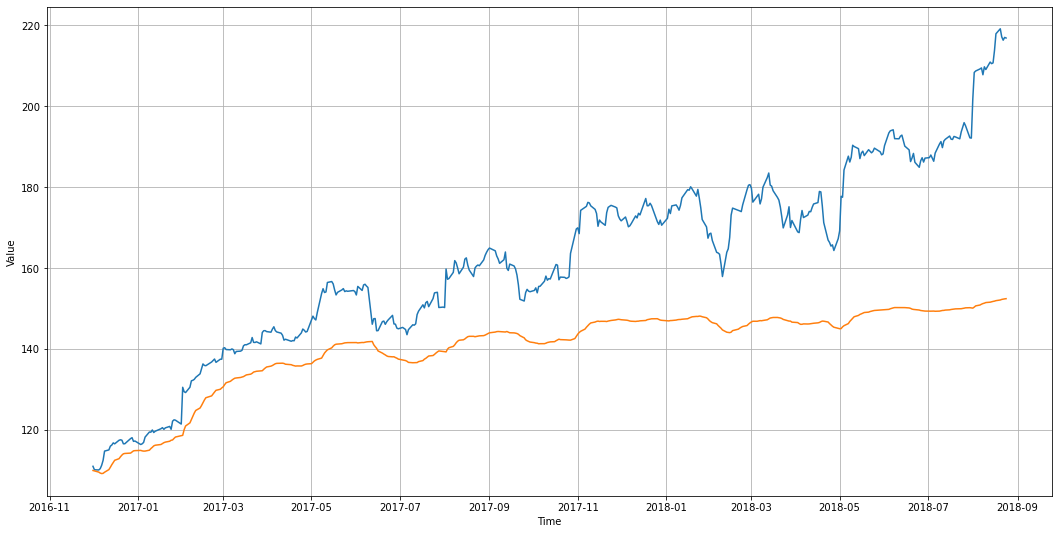

In [174]:
plot_two(days, split_time, valid_data, predicted_lstm)

In [176]:
predicted_n_days=predict_next_n_days(, lstm, series, split_time, window_size)

In [179]:
predicted_n_days

[109.90332,
 109.58854,
 109.24591,
 108.896866,
 108.554855,
 108.19872,
 107.84247,
 107.49478,
 107.162155,
 106.82651,
 106.491516,
 106.154144,
 105.81875,
 105.48507,
 105.1661,
 104.84494,
 104.515114,
 104.19329,
 103.86963,
 103.54048,
 103.21293,
 102.874626,
 102.52913,
 102.18273,
 101.82379,
 101.4552,
 101.08812,
 100.71848,
 100.34851,
 99.96266,
 99.56222,
 99.133606,
 98.697784,
 98.27915,
 97.8933,
 97.520966,
 97.13743,
 96.73515,
 96.32108,
 95.887596,
 95.460625,
 95.0328,
 94.58748,
 94.12523,
 93.663506,
 93.20133,
 92.713806,
 92.21762,
 91.71437,
 91.21102,
 90.68914,
 90.16984,
 89.647545,
 89.13628,
 88.618,
 88.078415,
 87.53511,
 86.994194,
 86.44344,
 85.89136,
 85.32984,
 84.764275,
 84.1964,
 83.63296,
 83.05993,
 82.461845,
 81.871185,
 81.26718,
 80.65086,
 80.02468,
 79.37964,
 78.72435,
 78.0577,
 77.3932,
 76.72474,
 76.03342,
 75.324165,
 74.58552,
 73.84188,
 73.10159,
 72.37493,
 71.630875,
 70.88676,
 70.149956,
 69.40502,
 68.65162,
 67.90675,


In [186]:
valid_days=days[split_time:split_time+365]

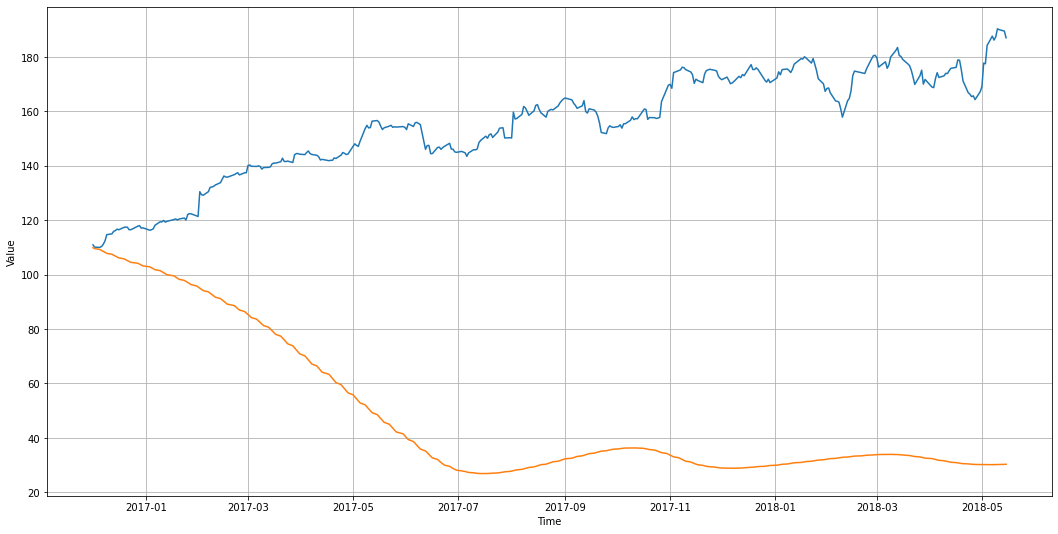

In [187]:
plot_two(valid_days, 0, valid_data[:365], predicted_n_days[:365])

In [ ]:
kr.metrics.mean_squared_error(valid_data, predicted_lstm).numpy()

In [ ]:
kr.metrics.mean_absolute_error(valid_data, predicted_lstm).numpy()

In [191]:
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler(feature_range=(0,1))
series=scaler.fit_transform(series.reshape(-1,1))

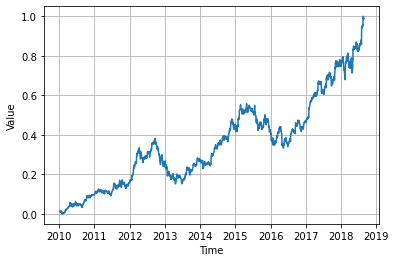

In [193]:
plot_series(days, series)

In [201]:
series=series.reshape(1,-1)

In [204]:
series=series[0]

In [208]:
train_data=series[:split_time]

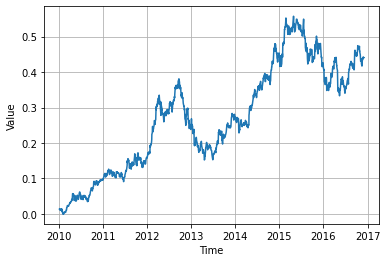

In [209]:
plot_series(days[:split_time], train_data)

In [215]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [216]:
#Introduce parameters
window_size=30
n=30
batch_size=128 #2^n sth
nof_epochs=100
lr_rate=1e-6
mom=0.9
split_time=1741

In [217]:
#Create windows on training data
train_windows, train_batch= create_windows(train_data, window_size= window_size, batch_size= batch_size )

In [218]:
lstm = kr.Sequential()

lstm.add(kr.layers.Lambda(lambda data : tf.expand_dims(data, axis=-1), input_shape=[None]))#preprocess the input dim for univariate

lstm.add(kr.layers.Bidirectional(kr.layers.LSTM(32, return_sequences=True)))#hidden layer with relu activation

lstm.add(kr.layers.Bidirectional(kr.layers.LSTM(32, return_sequences=False)))#hidden layer with relu activation

lstm.add(kr.layers.Dense(1))#output layer

#lstm.add(kr.layers.Lambda(lambda x:  100.0*x ))#scaling 

lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 64)          8704      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 33,601
Trainable params: 33,601
Non-trainable params: 0
_________________________________________________________________


In [219]:
# Compiling 
lstm.compile(loss = kr.losses.Huber(), optimizer=kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics = ["mae", "mse"])

In [220]:
history_lstm= lstm.fit(train_batch, callbacks=[lr_optimizer], epochs=nof_epochs)

Epoch 1/100
14/14 [==============================] - 4s 263ms/step - loss: 0.0534 - mae: 0.2890 - mse: 0.1067
Epoch 2/100
14/14 [==============================] - 0s 35ms/step - loss: 0.0537 - mae: 0.2890 - mse: 0.1067
Epoch 3/100
14/14 [==============================] - 1s 38ms/step - loss: 0.0531 - mae: 0.2890 - mse: 0.1067
Epoch 4/100
14/14 [==============================] - 1s 37ms/step - loss: 0.0534 - mae: 0.2890 - mse: 0.1067
Epoch 5/100
14/14 [==============================] - 1s 40ms/step - loss: 0.0537 - mae: 0.2890 - mse: 0.1067
Epoch 6/100
14/14 [==============================] - 0s 35ms/step - loss: 0.0533 - mae: 0.2890 - mse: 0.1067
Epoch 7/100
14/14 [==============================] - 1s 36ms/step - loss: 0.0536 - mae: 0.2890 - mse: 0.1067
Epoch 8/100
14/14 [==============================] - 1s 37ms/step - loss: 0.0535 - mae: 0.2890 - mse: 0.1067
Epoch 9/100
14/14 [==============================] - 1s 37ms/step - loss: 0.0536 - mae: 0.2890 - mse: 0.1067: 0s - loss: 0.0538

14/14 [==============================] - 1s 40ms/step - loss: 0.0381 - mae: 0.2339 - mse: 0.0761
Epoch 76/100
14/14 [==============================] - 1s 39ms/step - loss: 0.0366 - mae: 0.2286 - mse: 0.0732
Epoch 77/100
14/14 [==============================] - 1s 40ms/step - loss: 0.0353 - mae: 0.2228 - mse: 0.0701
Epoch 78/100
14/14 [==============================] - 1s 39ms/step - loss: 0.0333 - mae: 0.2166 - mse: 0.0668
Epoch 79/100
14/14 [==============================] - 1s 40ms/step - loss: 0.0317 - mae: 0.2100 - mse: 0.0634
Epoch 80/100
14/14 [==============================] - 1s 39ms/step - loss: 0.0299 - mae: 0.2028 - mse: 0.0598
Epoch 81/100
14/14 [==============================] - 1s 39ms/step - loss: 0.0282 - mae: 0.1954 - mse: 0.0561
Epoch 82/100
14/14 [==============================] - 1s 40ms/step - loss: 0.0261 - mae: 0.1877 - mse: 0.0523
Epoch 83/100
14/14 [==============================] - 1s 40ms/step - loss: 0.0244 - mae: 0.1800 - mse: 0.0486
Epoch 84/100
14/14 [===

(1e-08, 0.001, 0.0, 30.0)

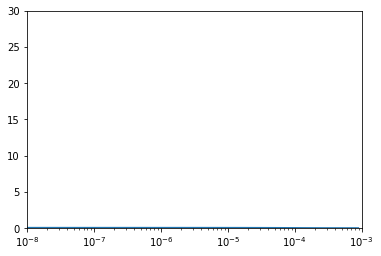

In [221]:
#plot mse across lr
plt.semilogx(history_lstm.history["lr"], history_lstm.history["loss"])
plt.axis([1e-8, 1e-3, 0, 30])

In [230]:
n=400
predicted_n_days=predict_next_n_days(n, lstm, series, split_time, window_size)

In [231]:
valid_days=days[split_time:split_time+n]
valid_data=series[split_time:split_time+n]

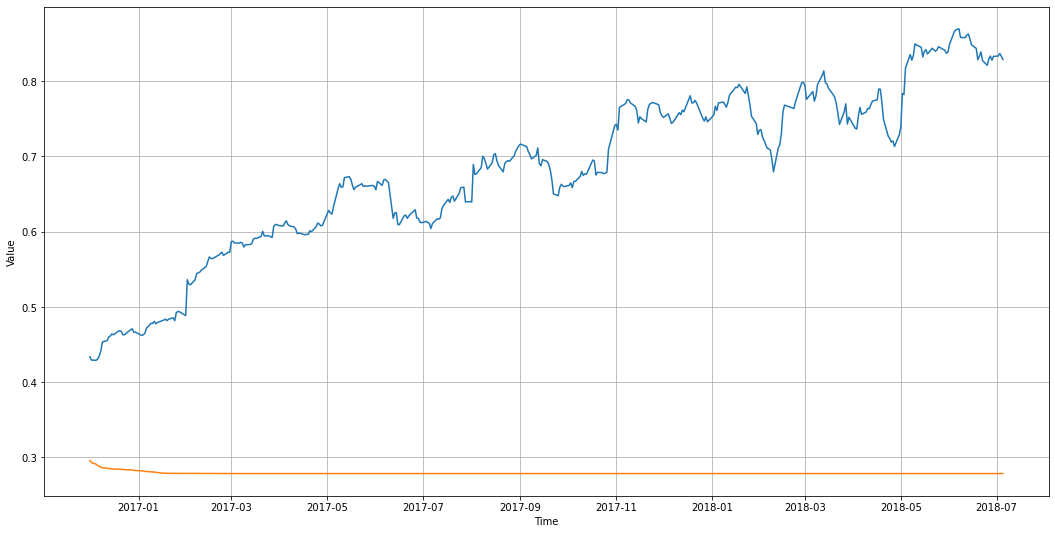

In [232]:
plot_two(valid_days, 0, valid_data, predicted_n_days[:n])

# 6.CNN- Bidirectional LSTM

In [ ]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
#Create windows on training data
train_data2= tf.expand_dims(train_data, axis=-1)
train_windows, train_batch= create_windows(train_data2, window_size= 30, batch_size= batch_size )

In [ ]:
cnn_lstm = kr.Sequential()

cnn_lstm.add(kr.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='causal', activation='relu',
                                        input_shape=[None, 1]))  # pre-process the input dim for uni-variate analysis

cnn_lstm.add(kr.layers.Bidirectional(kr.layers.LSTM(32, return_sequences=True)))#hidden layer with relu activation

cnn_lstm.add(kr.layers.Bidirectional(kr.layers.LSTM(32, return_sequences=True)))#hidden layer with relu activation

cnn_lstm.add(kr.layers.Dense(1))#output layer

cnn_lstm.add(kr.layers.Lambda(lambda x:  200.0*x ))#scaling 

cnn_lstm.summary()

In [ ]:
cnn_lstm.compile(loss = kr.losses.Huber(), optimizer=kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics = ["mae", "mse"])

In [ ]:
history_cnn_lstm= cnn_lstm.fit(train_batch, epochs=4*nof_epochs)

In [ ]:
plot_mse(history_cnn_lstm)

In [ ]:
train_batch.shape

In [ ]:
predicted_cnn_lstm=compute_predicted(cnn_lstm, series, split_time, window_size)

In [ ]:
plot_two(days, split_time, valid_data, predicted_cnn_lstm)

In [ ]:
kr.metrics.mean_squared_error(valid_data, predicted_cnn_lstm).numpy()

In [ ]:
kr.metrics.mean_absolute_error(valid_data, predicted_cnn_lstm).numpy()

# Without windows

In [233]:
data

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14
...,...,...,...,...,...,...,...,...
20973884,NZF,14.60,14.59,14.590000,14.58,14.62,137500,2018-08-20
20973885,NZF,14.60,14.58,14.580000,14.57,14.61,151200,2018-08-21
20973886,NZF,14.58,14.59,14.590000,14.57,14.63,185400,2018-08-22
20973887,NZF,14.60,14.57,14.570000,14.57,14.64,135600,2018-08-23


In [305]:
df_feat=filter_by_company(data, "AA")[["open", "low", "high", "volume"]]
df_label=filter_by_company(data, "AA")[["close"]]

In [306]:
df_feat

,open,low,high,volume
14184994,7.140915,7.140915,7.225020,22500
14184995,7.140915,7.048800,7.209000,25900
14184996,7.056810,7.008750,7.108875,92500
14184997,6.956685,6.940665,6.956685,73900
14184998,6.948675,6.916635,7.008750,57900
...,...,...,...,...
14332338,42.570000,41.709999,42.869999,2730900
14332368,41.880001,41.880001,43.220001,3095900
14332370,43.200001,43.119999,43.790001,2037900
14332390,42.500000,41.889999,42.730000,2813000


In [307]:
x_series=df_feat.to_numpy()
y_series=df_label.to_numpy()

In [308]:
x_series.shape

(12273, 4)

In [309]:
x_series=x_series.reshape(x_series.shape[0],1, x_series.shape[1])
y_series=y_series.reshape(y_series.shape[0],1, y_series.shape[1])

In [311]:
x_series.shape

(12273, 1, 4)

In [312]:
split_time=0.9*x_series.shape[0]

In [313]:
import math

In [314]:
split_time=math.ceil(split_time)

In [315]:
split_time

11046

In [316]:
train_x_series=x_series[:split_time]
train_y_series=y_series[:split_time]

test_x_series=x_series[split_time:]
test_y_series=y_series[split_time:]

In [346]:
train_x_series.shape

(11046, 1, 4)

In [347]:
len(train_x_series)

11046

In [348]:
train_x_series

array([[[7.14091492e+00, 7.14091492e+00, 7.22501993e+00, 2.25000000e+04]],

       [[7.14091492e+00, 7.04879999e+00, 7.20900011e+00, 2.59000000e+04]],

       [[7.05680990e+00, 7.00874996e+00, 7.10887480e+00, 9.25000000e+04]],

       ...,

       [[1.89836998e+01, 1.88395195e+01, 1.92240009e+01, 1.53027000e+07]],

       [[1.92480297e+01, 1.89356403e+01, 1.92480297e+01, 1.50413000e+07]],

       [[1.96325092e+01, 1.94402695e+01, 1.99449005e+01, 2.75993000e+07]]])

In [319]:
#Reset all models
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [325]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [326]:
#Introduce parameters
window_size=30
n=365
batch_size=32#2^n sth
nof_epochs=100
lr_rate=1e-6
mom=0.9


In [327]:
lstm = kr.Sequential()

lstm.add(layers.LSTM(1, input_shape=(1,4)))
lstm.add(layers.Dense(1))

lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 24        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [328]:
# Compiling 
lstm.compile(loss = kr.losses.Huber(), optimizer=kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics = ["mae", "mse"])

In [330]:
history_lstm= lstm.fit(train_x_series,train_y_series ,callbacks=[lr_optimizer], epochs=nof_epochs)

Train on 11046 samples
Epoch 1/100
11046/11046 [==============================] - 1s 123us/sample - loss: 28.2751 - mae: 28.7751 - mse: 1556.7666
Epoch 2/100
11046/11046 [==============================] - 1s 47us/sample - loss: 28.2750 - mae: 28.7750 - mse: 1556.7629
Epoch 3/100
11046/11046 [==============================] - 1s 50us/sample - loss: 28.2749 - mae: 28.7749 - mse: 1556.7587
Epoch 4/100
11046/11046 [==============================] - 1s 47us/sample - loss: 28.2748 - mae: 28.7748 - mse: 1556.7539
Epoch 5/100
11046/11046 [==============================] - 1s 49us/sample - loss: 28.2748 - mae: 28.7748 - mse: 1556.7494
Epoch 6/100
11046/11046 [==============================] - 1s 46us/sample - loss: 28.2747 - mae: 28.7747 - mse: 1556.7445
Epoch 7/100
11046/11046 [==============================] - 1s 49us/sample - loss: 28.2746 - mae: 28.7746 - mse: 1556.7385
Epoch 8/100
11046/11046 [==============================] - 1s 47us/sample - loss: 28.2745 - mae: 28.7745 - mse: 1556.7328


11046/11046 [==============================] - 1s 49us/sample - loss: 27.4330 - mae: 27.9330 - mse: 1509.0176
Epoch 67/100
11046/11046 [==============================] - 1s 49us/sample - loss: 27.3302 - mae: 27.8302 - mse: 1503.2637
Epoch 68/100
11046/11046 [==============================] - 1s 47us/sample - loss: 27.2149 - mae: 27.7149 - mse: 1496.8728
Epoch 69/100
11046/11046 [==============================] - 1s 50us/sample - loss: 27.0855 - mae: 27.5855 - mse: 1489.7156
Epoch 70/100
11046/11046 [==============================] - 1s 48us/sample - loss: 26.9403 - mae: 27.4403 - mse: 1481.7677
Epoch 71/100
11046/11046 [==============================] - 1s 51us/sample - loss: 26.7773 - mae: 27.2773 - mse: 1472.7882
Epoch 72/100
11046/11046 [==============================] - 1s 48us/sample - loss: 26.5946 - mae: 27.0945 - mse: 1462.9027
Epoch 73/100
11046/11046 [==============================] - 1s 49us/sample - loss: 26.3895 - mae: 26.8895 - mse: 1451.8435
Epoch 74/100
11046/11046 [===

(1e-08, 0.001, 0.0, 30.0)

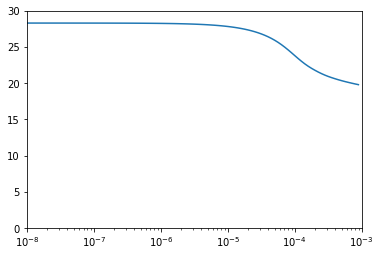

In [331]:
#plot mse across lr
plt.semilogx(history_lstm.history["lr"], history_lstm.history["loss"])
plt.axis([1e-8, 1e-3, 0, 30])

In [340]:
lr_rate=1e-3

In [341]:
import tensorflow as tf
from tensorflow import keras as kr
from tensorflow.keras import layers


In [342]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

In [343]:
#Introduce parameters
window_size=30
n=365
batch_size=32#2^n sth
nof_epochs=100
lr_rate=1e-6
mom=0.9

In [336]:
lstm = kr.Sequential()

lstm.add(layers.LSTM(1, input_shape=(1,4)))
lstm.add(layers.Dense(1))

lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 24        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [337]:
# Compiling 
lstm.compile(loss = kr.losses.Huber(), optimizer=kr.optimizers.SGD(lr=lr_rate, momentum=mom), metrics = ["mae", "mse"])

In [339]:
history_lstm= lstm.fit(train_x_series,train_y_series , epochs=5*nof_epochs)

Train on 11046 samples
Epoch 1/500
11046/11046 [==============================] - 2s 158us/sample - loss: 28.2725 - mae: 28.7725 - mse: 1556.6207
Epoch 2/500
11046/11046 [==============================] - 1s 50us/sample - loss: 28.2670 - mae: 28.7670 - mse: 1556.3062
Epoch 3/500
11046/11046 [==============================] - 1s 47us/sample - loss: 28.2616 - mae: 28.7616 - mse: 1555.9911
Epoch 4/500
11046/11046 [==============================] - 1s 49us/sample - loss: 28.2561 - mae: 28.7561 - mse: 1555.6771
Epoch 5/500
11046/11046 [==============================] - 1s 51us/sample - loss: 28.2506 - mae: 28.7506 - mse: 1555.3615
Epoch 6/500
11046/11046 [==============================] - 1s 52us/sample - loss: 28.2452 - mae: 28.7452 - mse: 1555.0458
Epoch 7/500
11046/11046 [==============================] - 1s 47us/sample - loss: 28.2397 - mae: 28.7397 - mse: 1554.7335
Epoch 8/500
11046/11046 [==============================] - 1s 49us/sample - loss: 28.2342 - mae: 28.7342 - mse: 1554.4167


11046/11046 [==============================] - 1s 48us/sample - loss: 27.9170 - mae: 28.4170 - mse: 1536.2861
Epoch 67/500
11046/11046 [==============================] - 1s 48us/sample - loss: 27.9115 - mae: 28.4115 - mse: 1535.9739
Epoch 68/500
11046/11046 [==============================] - 1s 47us/sample - loss: 27.9060 - mae: 28.4060 - mse: 1535.6643
Epoch 69/500
11046/11046 [==============================] - 1s 49us/sample - loss: 27.9005 - mae: 28.4006 - mse: 1535.3540
Epoch 70/500
11046/11046 [==============================] - 1s 47us/sample - loss: 27.8951 - mae: 28.3951 - mse: 1535.0446
Epoch 71/500
11046/11046 [==============================] - 1s 52us/sample - loss: 27.8896 - mae: 28.3896 - mse: 1534.7311
Epoch 72/500
11046/11046 [==============================] - ETA: 0s - loss: 27.9134 - mae: 28.4134 - mse: 1537.44 - 1s 49us/sample - loss: 27.8841 - mae: 28.3841 - mse: 1534.4220
Epoch 73/500
11046/11046 [==============================] - 1s 53us/sample - loss: 27.8787 - mae

11046/11046 [==============================] - 1s 54us/sample - loss: 27.5721 - mae: 28.0720 - mse: 1516.8036
Epoch 130/500
11046/11046 [==============================] - 1s 54us/sample - loss: 27.5666 - mae: 28.0666 - mse: 1516.4952
Epoch 131/500
11046/11046 [==============================] - 1s 53us/sample - loss: 27.5611 - mae: 28.0611 - mse: 1516.1892
Epoch 132/500
11046/11046 [==============================] - 1s 49us/sample - loss: 27.5556 - mae: 28.0556 - mse: 1515.8817
Epoch 133/500
11046/11046 [==============================] - 1s 55us/sample - loss: 27.5502 - mae: 28.0502 - mse: 1515.5730s - loss: 27.4958 - mae: 27.9958 - mse: 1510.68
Epoch 134/500
11046/11046 [==============================] - 1s 48us/sample - loss: 27.5447 - mae: 28.0447 - mse: 1515.2677
Epoch 135/500
11046/11046 [==============================] - 1s 48us/sample - loss: 27.5392 - mae: 28.0392 - mse: 1514.9598
Epoch 136/500
11046/11046 [==============================] - 1s 47us/sample - loss: 27.5337 - mae: 

11046/11046 [==============================] - 1s 54us/sample - loss: 27.2217 - mae: 27.7217 - mse: 1497.2523
Epoch 194/500
11046/11046 [==============================] - 1s 60us/sample - loss: 27.2162 - mae: 27.7162 - mse: 1496.9502
Epoch 195/500
11046/11046 [==============================] - ETA: 0s - loss: 27.2513 - mae: 27.7513 - mse: 1498.66 - 1s 55us/sample - loss: 27.2107 - mae: 27.7107 - mse: 1496.6448
Epoch 196/500
11046/11046 [==============================] - 1s 59us/sample - loss: 27.2052 - mae: 27.7052 - mse: 1496.3430
Epoch 197/500
11046/11046 [==============================] - 1s 50us/sample - loss: 27.1998 - mae: 27.6998 - mse: 1496.0398
Epoch 198/500
11046/11046 [==============================] - 1s 55us/sample - loss: 27.1943 - mae: 27.6943 - mse: 1495.7358
Epoch 199/500
11046/11046 [==============================] - 1s 49us/sample - loss: 27.1888 - mae: 27.6888 - mse: 1495.4335s - loss: 27.8889 - mae: 28.3889 
Epoch 200/500
11046/11046 [==============================

11046/11046 [==============================] - 1s 59us/sample - loss: 26.8767 - mae: 27.3767 - mse: 1478.2469
Epoch 257/500
11046/11046 [==============================] - 1s 57us/sample - loss: 26.8712 - mae: 27.3712 - mse: 1477.9489
Epoch 258/500
11046/11046 [==============================] - 1s 46us/sample - loss: 26.8658 - mae: 27.3658 - mse: 1477.6493
Epoch 259/500
11046/11046 [==============================] - 1s 51us/sample - loss: 26.8603 - mae: 27.3603 - mse: 1477.3478
Epoch 260/500
11046/11046 [==============================] - 1s 55us/sample - loss: 26.8548 - mae: 27.3548 - mse: 1477.0476
Epoch 261/500
11046/11046 [==============================] - 1s 56us/sample - loss: 26.8493 - mae: 27.3493 - mse: 1476.7498
Epoch 262/500
11046/11046 [==============================] - 1s 52us/sample - loss: 26.8439 - mae: 27.3439 - mse: 1476.4486
Epoch 263/500
11046/11046 [==============================] - 1s 55us/sample - loss: 26.8384 - mae: 27.3384 - mse: 1476.1503
Epoch 264/500
11046/11

11046/11046 [==============================] - 1s 55us/sample - loss: 26.5208 - mae: 27.0208 - mse: 1458.8881s - loss: 26.7598 - mae: 27.2
Epoch 322/500
11046/11046 [==============================] - 1s 47us/sample - loss: 26.5154 - mae: 27.0154 - mse: 1458.5927
Epoch 323/500
11046/11046 [==============================] - 1s 51us/sample - loss: 26.5099 - mae: 27.0099 - mse: 1458.2970
Epoch 324/500
11046/11046 [==============================] - 1s 52us/sample - loss: 26.5044 - mae: 27.0044 - mse: 1457.9998
Epoch 325/500
11046/11046 [==============================] - 1s 74us/sample - loss: 26.4990 - mae: 26.9989 - mse: 1457.7065
Epoch 326/500
11046/11046 [==============================] - 1s 54us/sample - loss: 26.4935 - mae: 26.9934 - mse: 1457.4099
Epoch 327/500
11046/11046 [==============================] - 1s 50us/sample - loss: 26.4880 - mae: 26.9880 - mse: 1457.1144
Epoch 328/500
11046/11046 [==============================] - 1s 54us/sample - loss: 26.4825 - mae: 26.9825 - mse: 145

11046/11046 [==============================] - 1s 60us/sample - loss: 26.1761 - mae: 26.6759 - mse: 1440.3652
Epoch 385/500
11046/11046 [==============================] - 1s 53us/sample - loss: 26.1706 - mae: 26.6704 - mse: 1440.0740
Epoch 386/500
11046/11046 [==============================] - 1s 56us/sample - loss: 26.1652 - mae: 26.6650 - mse: 1439.7826
Epoch 387/500
11046/11046 [==============================] - 1s 50us/sample - loss: 26.1597 - mae: 26.6595 - mse: 1439.4890
Epoch 388/500
11046/11046 [==============================] - 1s 48us/sample - loss: 26.1542 - mae: 26.6540 - mse: 1439.1990
Epoch 389/500
11046/11046 [==============================] - 1s 51us/sample - loss: 26.1488 - mae: 26.6485 - mse: 1438.9066
Epoch 390/500
11046/11046 [==============================] - 1s 48us/sample - loss: 26.1433 - mae: 26.6431 - mse: 1438.6145
Epoch 391/500
11046/11046 [==============================] - 1s 52us/sample - loss: 26.1378 - mae: 26.6376 - mse: 1438.3240
Epoch 392/500
11046/11

11046/11046 [==============================] - 1s 50us/sample - loss: 25.8322 - mae: 26.3312 - mse: 1422.0942
Epoch 448/500
11046/11046 [==============================] - 1s 47us/sample - loss: 25.8268 - mae: 26.3257 - mse: 1421.8073s - loss: 25.3552 - mae: 25.8
Epoch 449/500
11046/11046 [==============================] - 1s 49us/sample - loss: 25.8213 - mae: 26.3203 - mse: 1421.5199
Epoch 450/500
11046/11046 [==============================] - 1s 46us/sample - loss: 25.8159 - mae: 26.3148 - mse: 1421.2318
Epoch 451/500
11046/11046 [==============================] - 1s 49us/sample - loss: 25.8105 - mae: 26.3094 - mse: 1420.9464
Epoch 452/500
11046/11046 [==============================] - 1s 46us/sample - loss: 25.8050 - mae: 26.3039 - mse: 1420.6571
Epoch 453/500
11046/11046 [==============================] - 1s 49us/sample - loss: 25.7996 - mae: 26.2984 - mse: 1420.3712
Epoch 454/500
11046/11046 [==============================] - 1s 46us/sample - loss: 25.7942 - mae: 26.2930 - mse: 142